In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# Einlesen der Daten
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter = ';' )
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv',delimiter = ';')
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv',delimiter = ';')



DMS Score Spalten zu float konvertieren:

In [3]:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_deng.head()

data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler.head()

data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg.tail()



mutant                                   mutated_sequence  DMS_score  \
4778  W286G  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0056   
4779  W286F  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.1729   
4780  W286E  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0171   
4781  W286C  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0024   
4782  W286D  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0114   

      DMS_score_bin  
4778              0  
4779              0  
4780              0  
4781              0  
4782              0

In [4]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


Data Frame erstellen

In [5]:

columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame( columns = columns, index = index)
merged.head()
#leerer frame

Stiffler Deng Firnberg
H24C      NaN  NaN      NaN
H24Y      NaN  NaN      NaN
H24W      NaN  NaN      NaN
H24V      NaN  NaN      NaN
H24T      NaN  NaN      NaN

In [6]:
#dataframe füllen
for i in range(0,len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant]= score

merged.head()



Stiffler Deng Firnberg
H24C  -0.41826  NaN      NaN
H24Y -0.885025  NaN      NaN
H24W -1.347586  NaN      NaN
H24V -0.026874  NaN      NaN
H24T -0.067188  NaN      NaN

In [7]:

#Mutanten in einheitlicher Reihenfolge speichern, sie gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


In [8]:

for i in range(0,len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]
    merged['Deng'][mutant]= score

merged.head()

Stiffler      Deng Firnberg
H24C  -0.41826 -3.924478      NaN
H24Y -0.885025 -2.170022      NaN
H24W -1.347586 -4.345218      NaN
H24V -0.026874 -3.011503      NaN
H24T -0.067188 -1.565248      NaN

In [9]:
for i in range(0,len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant]= score

print(merged)

       Stiffler      Deng Firnberg
H24C   -0.41826 -3.924478   0.5646
H24Y  -0.885025 -2.170022   0.7054
H24W  -1.347586 -4.345218   0.6021
H24V  -0.026874 -3.011503   1.2224
H24T  -0.067188 -1.565248   1.2289
...         ...       ...      ...
W286G -3.228429  -4.96307   0.0056
W286F -0.780425 -4.542329   0.1729
W286E -2.545852 -4.542329   0.0171
W286C -2.983762 -4.542329   0.0024
W286A -3.178798  -4.96307      NaN

[4996 rows x 3 columns]


Merged Dataframe nicht Normalisiert

In [10]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

print(mergedc_n.head(20))

      Stiffler      Deng Firnberg
H24C  -0.41826 -3.924478   0.5646
H24Y -0.885025 -2.170022   0.7054
H24W -1.347586 -4.345218   0.6021
H24V -0.026874 -3.011503   1.2224
H24T -0.067188 -1.565248   1.2289
H24S  0.036166 -1.901829   1.1215
H24R -0.002526 -1.732651   1.0547
H24Q -0.135568 -1.685328   0.9294
H24P -1.010848  -2.74331   0.2836
H24D -0.181607 -2.788294   1.0992
H24M -0.224781 -4.345218      NaN
H24L -0.480347 -3.924478   0.8055
H24K   0.01447  -0.47765   1.2413
H24I -0.359191  -2.83688   0.7909
H24G -0.060242 -2.113703   1.1275
H24F -0.818487 -4.345218   0.7883
H24E -0.279024 -1.486533   0.9899
H24N -0.043093 -1.102421   1.4825
P25C -0.364138  -3.92495   0.6226
P25D -0.028403  -3.92495   0.6841


N Normalisierter dataframe :  merged_n

In [11]:
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.250327  0.194307
H24Y   0.697293  0.456368  0.242832
H24W   0.584448  0.200915   0.20723
H24V   0.906646  0.357546  0.421009
H24T   0.896811  0.527393  0.423249
...         ...       ...       ...
W286G  0.125601  0.128355  0.001654
W286F  0.722811  0.177767  0.059312
W286E  0.292121  0.177767  0.005618
W286C   0.18529  0.177767  0.000551
W286A  0.137709  0.128355       NaN

[4996 rows x 3 columns]


Z Normalisierter data frame: mergedc_z
mü und sigma für Datensätze : 

In [12]:
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])
    
    gauss[x] = [mu, sigma]
print(gauss)



{'Stiffler': [-1.2555861699099258, 1.1515351455907572], 'Deng': [-2.7197178679617875, 1.527209855765294], 'Firnberg': [0.5094850899205352, 0.44877201488038154]}


Z-Normalisierung

In [13]:
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
print(z_filter(mergedc_z))


       Stiffler      Deng  Firnberg
H24C   0.727139 -0.788864  0.122813
H24Y   0.321797  0.359935  0.436558
H24W  -0.079893 -1.064359  0.206374
H24V   1.067021 -0.191058   1.58859
H24T   1.032012  0.755934  1.603074
...         ...       ...       ...
W286G -1.713229 -1.468922 -1.122809
W286F  0.412633 -1.193425 -0.750014
W286E -1.120475 -1.193425 -1.097183
W286C -1.500758 -1.193425 -1.129939
W286A -1.670129 -1.468922       NaN

[4996 rows x 3 columns]


##Normalisierte Datensätze mergen:
1. mean und var berechnen
2. für z und n normalisierte Datensatz 



In [14]:
def mean_var_merge(data : pd.DataFrame):
    
    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data
#print(mean_var_merge(mergedc_n_mv))
#print(mean_var_merge(mergedc_z_mv))
#print(mergedc_n_mv)

In [15]:
mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)


Stiffler      Deng  Firnberg      mean       var
H24C   0.727139 -0.788864  0.122813  0.020363  0.388292
H24Y   0.321797  0.359935  0.436558  0.372763  0.002277
H24W  -0.079893 -1.064359  0.206374 -0.312626   0.29621
H24V   1.067021 -0.191058   1.58859  0.821518  0.557994
H24T   1.032012  0.755934  1.603074   1.13034  0.124442
...         ...       ...       ...       ...       ...
W286G -1.713229 -1.468922 -1.122809 -1.434986  0.058675
W286F  0.412633 -1.193425 -0.750014 -0.510269  0.458642
W286E -1.120475 -1.193425 -1.097183 -1.137028  0.001681
W286C -1.500758 -1.193425 -1.129939 -1.274708  0.026221
W286A -1.670129 -1.468922       NaN -1.569525  0.010121

[4996 rows x 5 columns]

In [16]:

#append empty Position-column
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)
mergedc_n_mv["Position"]=mergedc_n_mv["Position"].astype(int)

mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)
mergedc_z_mv["Position"] = mergedc_z_mv["Position"].astype(int)


C:\Users\malte\AppData\Local\Temp\ipykernel_18884\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_18884\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_18884\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Positio

In [17]:
#Position_means Df aufbauen
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)
##warum muss ich hier nochmal Int() nutzen? Ich habe im Chunk darüber doch int(part) verwendet...(Positionswerte wurden scheinbar als floats gespeichert)?

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"


In [18]:
for i in range(mergedc_n_mv["Position"][0], mergedc_n_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(mergedc_z_mv["Position"][0], mergedc_z_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [19]:
#means für Positionen berechnen mit groupby

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NAs should be excluded by default)

#Means der Positionen in Position_means DF einsetzen
position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]


In [20]:
#Varianzen noch einbringen
position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]


position_means

mean_Stiffler_n var_Stiffler_n mean_Deng_n var_Deng_n  \
Position                                                         
24              0.827952       0.009871     0.40783   0.019859   
25              0.868782       0.010995    0.424186   0.029516   
26              0.887442       0.001312    0.512003   0.009361   
27              0.463575       0.039616    0.345967   0.005709   
28              0.712919       0.045084    0.415597   0.017025   
...                  ...            ...         ...        ...   
282             0.511994       0.082602    0.474935   0.018866   
283             0.577036       0.064666    0.448505   0.013882   
284             0.838571       0.021394    0.467188   0.020676   
285             0.768163       0.040906    0.400825   0.026953   
286             0.314421       0.027956    0.152398   0.001021   

         mean_Firnberg_n var_Firnberg_n mean_all_n var_all_n mean_Stiffler_z  \
Position                                                                       
24              0.324853        0.01085   0.523898  0.061493        0.786898   
25              0.251631       0.005555   0.514866  0.082138        0.932237   
26              0.315543       0.007382   0.619685  0.057627        0.998662   
27              0.095793       0.009894   0.301778  0.040958       -0.510157   
28              0.189328       0.009222   0.458146    0.0679        0.377421   
...                  ...            ...        ...       ...             ...   
282             0.117033       0.019768   0.367987  0.070003       -0.337803   
283             0.151755        0.01685   0.392432  0.061842       -0.106276   
284               0.3261       0.009417   0.547843   0.06307        0.824699   
285             0.250498       0.014158   0.477138  0.073332         0.57407   
286             0.027791       0.001888   0.167318  0.023562       -1.041095   

         var_Stiffler_z mean_Deng_z var_Deng_z mean_Firnberg_z var_Firnberg_z  \
Position                                                                        
24             0.125082    0.089304   0.617338        0.966881       0.453596   
25             0.139314    0.180497   0.917549         0.49345       0.232222   
26              0.01663    0.670128   0.291014        0.906685       0.308594   
27              0.50198   -0.255614   0.177461       -0.514142       0.413599   
28             0.571262    0.132612   0.529266        0.090621       0.385542   
...                 ...         ...        ...             ...            ...   
282            1.046659    0.463454    0.58649       -0.376808       0.826386   
283            0.819396     0.31609   0.431554       -0.152312       0.704399   
284            0.271089    0.420258   0.642744        0.974941       0.393654   
285            0.518326    0.050248   0.837884        0.486125       0.591881   
286            0.354228   -1.334869   0.031742       -0.953817       0.078933   

         mean_all_z var_all_z  
Position                       
24          0.60771  0.518624  
25         0.535395  0.502145  
26         0.849455  0.195452  
27        -0.426638  0.359798  
28          0.20849  0.491832  
...             ...       ...  
282       -0.083719  0.926648  
283        0.019167  0.661913  
284         0.73577  0.468079  
285        0.368077  0.668752  
286       -1.112715  0.174624  

[263 rows x 16 columns]

<Axes: ylabel='Position'>

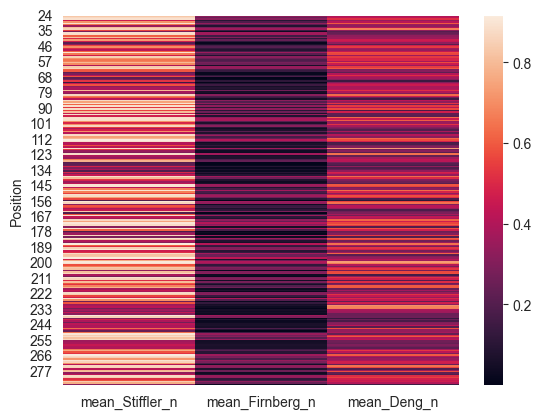

In [21]:
#Untersuchung: Welche Normierungsmethode ist besser? -> Annahme: Firnberg und Stiffler (gleiche Methode in Fitnesswert-Ermittlung) sollten ähnliche Zahlenwerte für Mutanten aufweisen. Wie nah Deng-Werte an den anderen beiden Datensätzen liegen ist noch unklar.

#visuelle Analyse per heatmap:

# Heatmap N (Mean_S_n, Mean_F_n, Mean_D_n)
spalten_n = [0, 4, 2]
position_means_rearranged = position_means.iloc[:, spalten_n]

data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)


<Axes: ylabel='Position'>

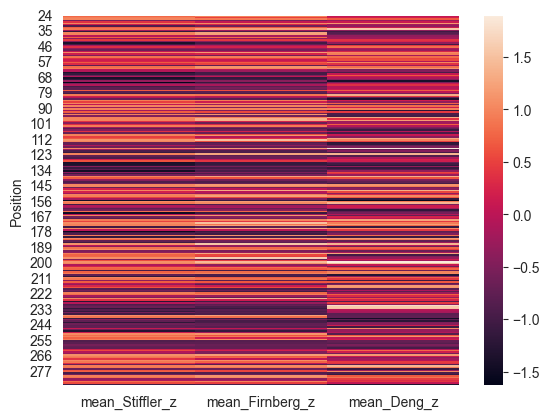

In [22]:
# Heatmap Z (Mean_S_Z, Mean_F_Z, Mean_D_Z)
spalten_z = [8, 12, 10]
position_means_rearranged = position_means.iloc[:, spalten_z]


data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)

Es wird deutlich, dass die Stiffler- und Firnberg-Werte bei der Z-Normierung nah beieinander leigen. Für die N-Noermierung ergibt sich für die beiden Datensätze zwar ein ähnliches Muster, jedoch scheinen die Firnberg-Werte durchweg geringer zu sein, als die Stiffler-Werte. Somit wird die Z-Normierung als Noermierungsmethode für die Datensätze gewählt und mit den auf diese Weise normierten Daten im Folgenden weiter gearbeitet. Ferner wird deutlich, dass die Deng-Werte wie erwartet stärker von den Stiffler- bzw. Firnberg-Daten abweichen als jene untereinander.

In [23]:
#N-Normierung droppen
position_means_Z=position_means.iloc[:,8:]
position_means_Z

mean_Stiffler_z var_Stiffler_z mean_Deng_z var_Deng_z  \
Position                                                         
24              0.786898       0.125082    0.089304   0.617338   
25              0.932237       0.139314    0.180497   0.917549   
26              0.998662        0.01663    0.670128   0.291014   
27             -0.510157        0.50198   -0.255614   0.177461   
28              0.377421       0.571262    0.132612   0.529266   
...                  ...            ...         ...        ...   
282            -0.337803       1.046659    0.463454    0.58649   
283            -0.106276       0.819396     0.31609   0.431554   
284             0.824699       0.271089    0.420258   0.642744   
285              0.57407       0.518326    0.050248   0.837884   
286            -1.041095       0.354228   -1.334869   0.031742   

         mean_Firnberg_z var_Firnberg_z mean_all_z var_all_z  
Position                                                      
24              0.966881       0.453596    0.60771  0.518624  
25               0.49345       0.232222   0.535395  0.502145  
26              0.906685       0.308594   0.849455  0.195452  
27             -0.514142       0.413599  -0.426638  0.359798  
28              0.090621       0.385542    0.20849  0.491832  
...                  ...            ...        ...       ...  
282            -0.376808       0.826386  -0.083719  0.926648  
283            -0.152312       0.704399   0.019167  0.661913  
284             0.974941       0.393654    0.73577  0.468079  
285             0.486125       0.591881   0.368077  0.668752  
286            -0.953817       0.078933  -1.112715  0.174624  

[263 rows x 8 columns]

In [80]:
import pickle
position_means_Z.to_pickle('./position_means')

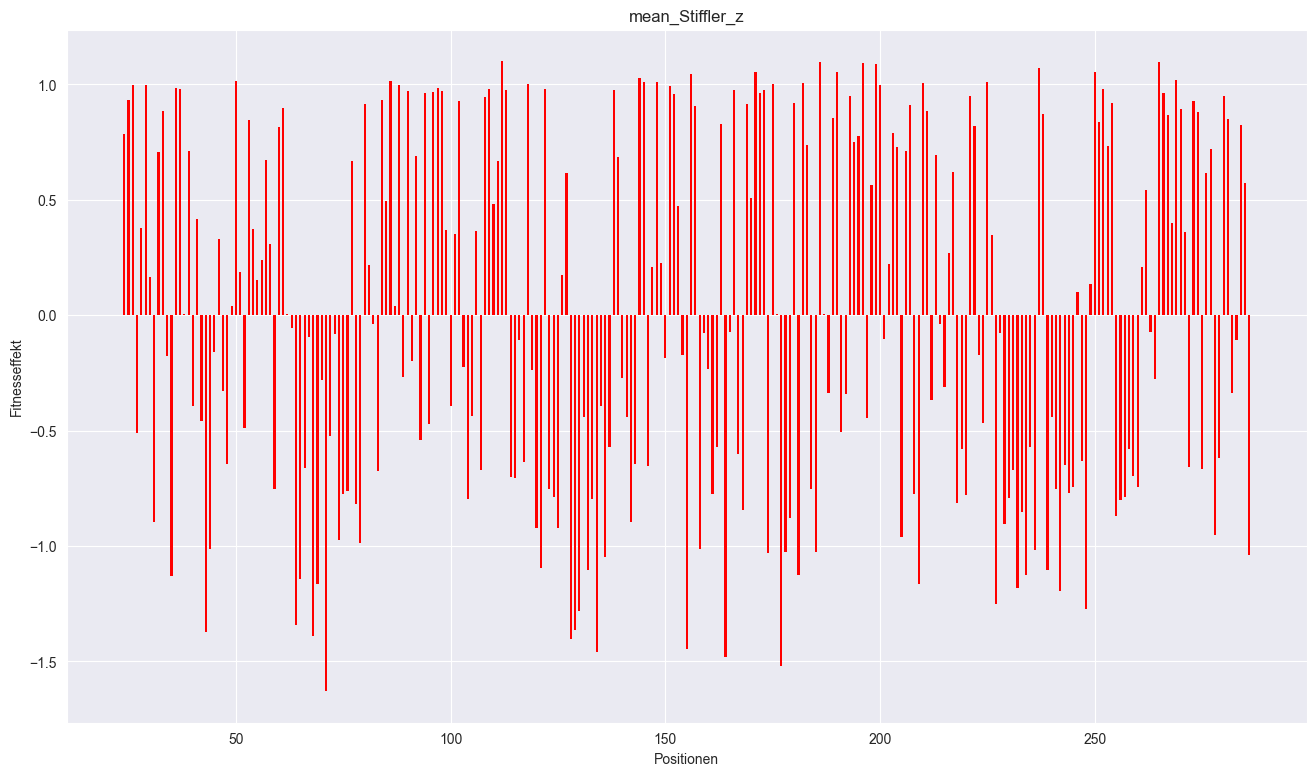

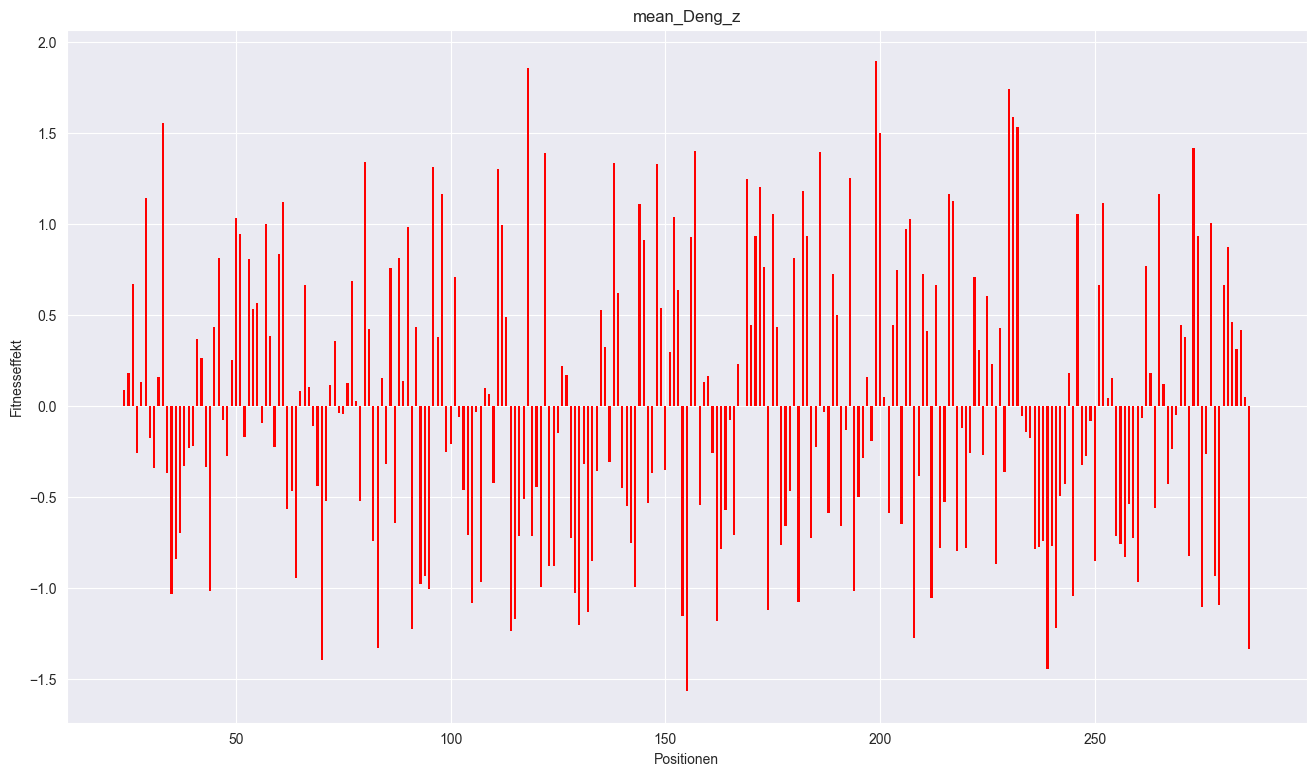

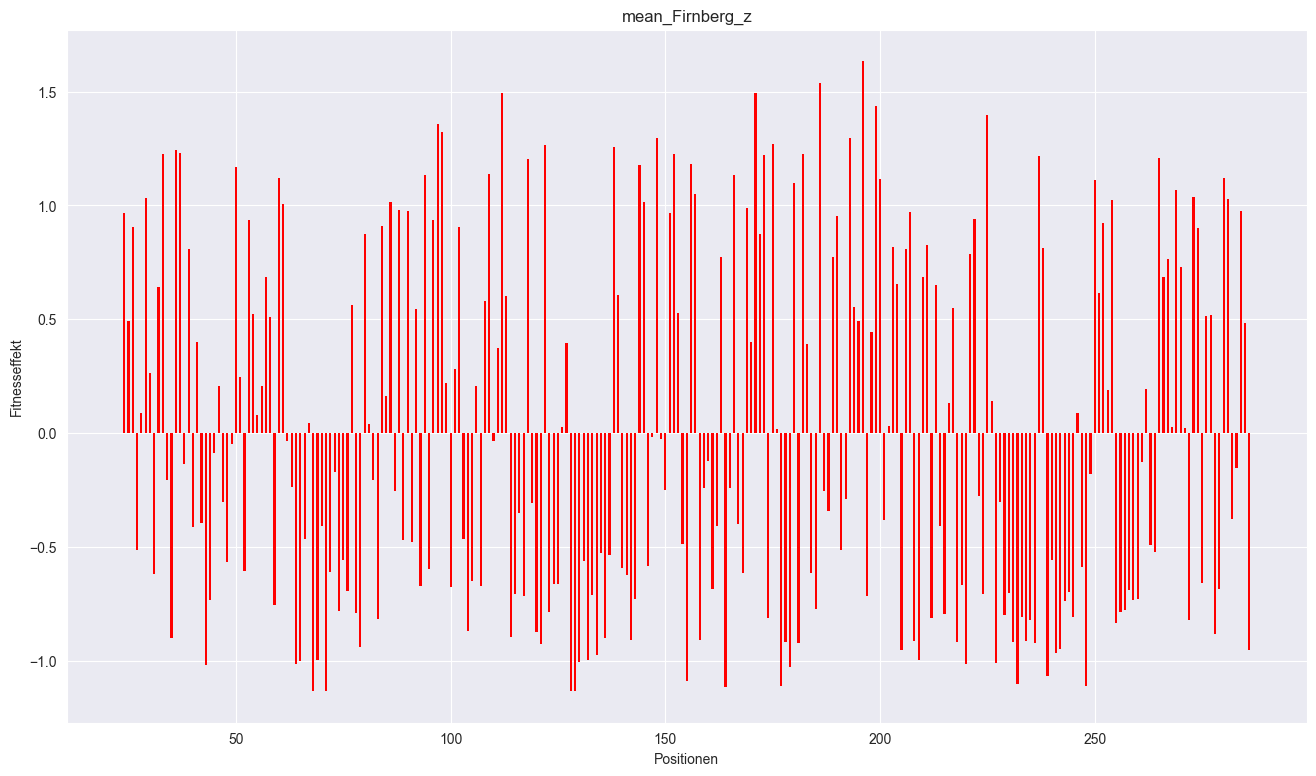

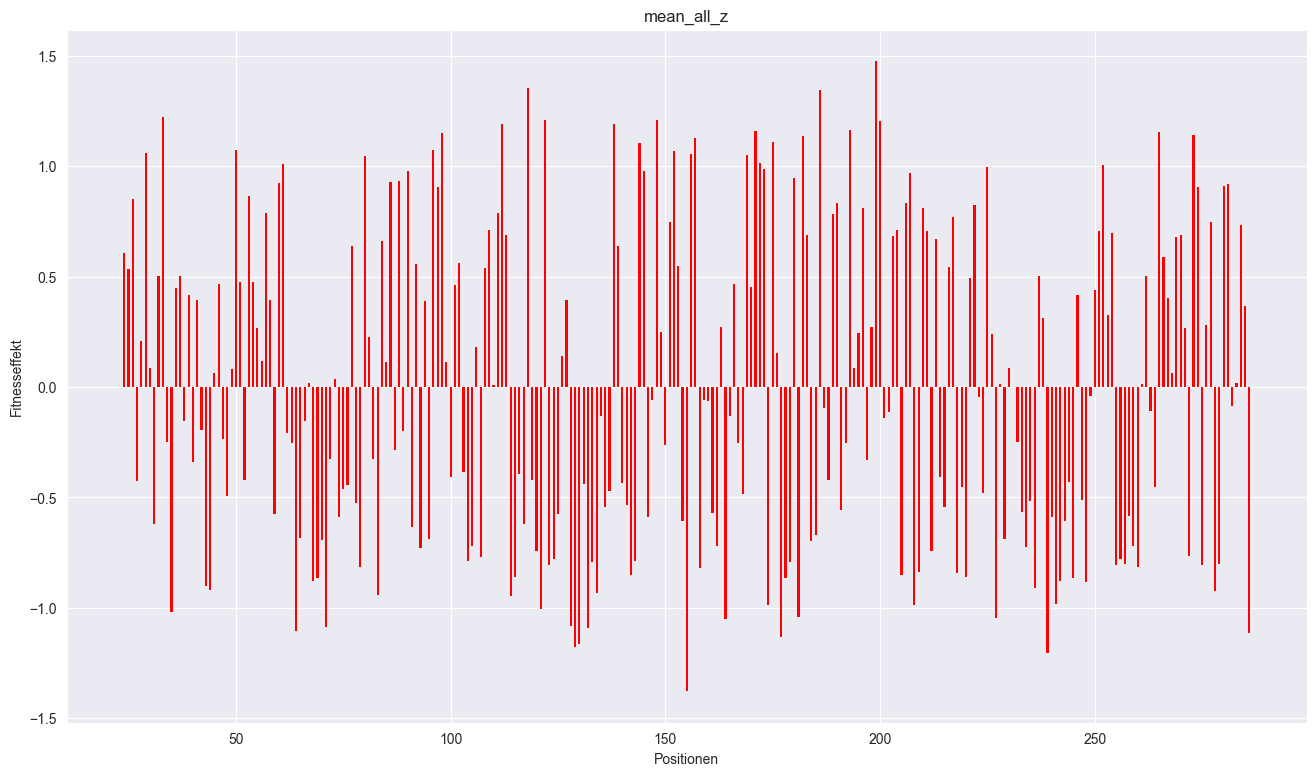

In [24]:
#Diagramme mit Positionseffektenh
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()

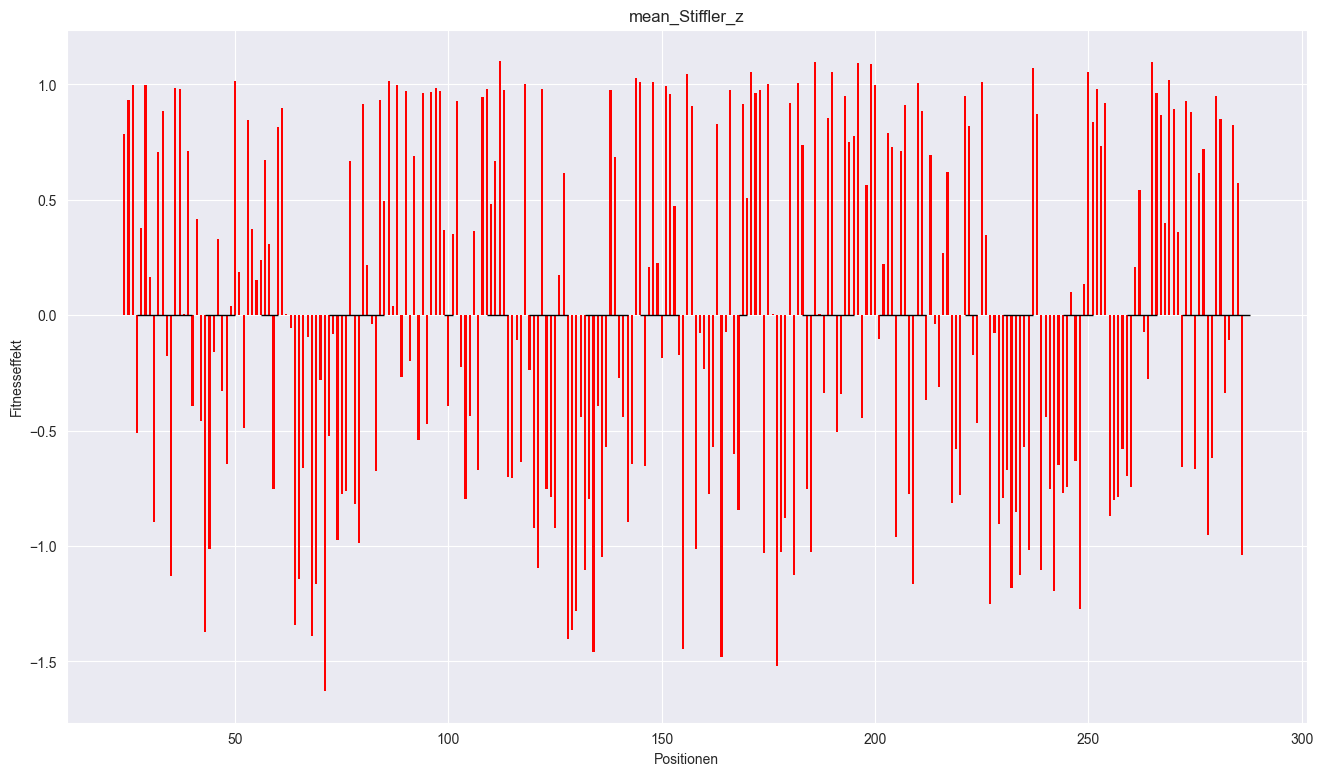

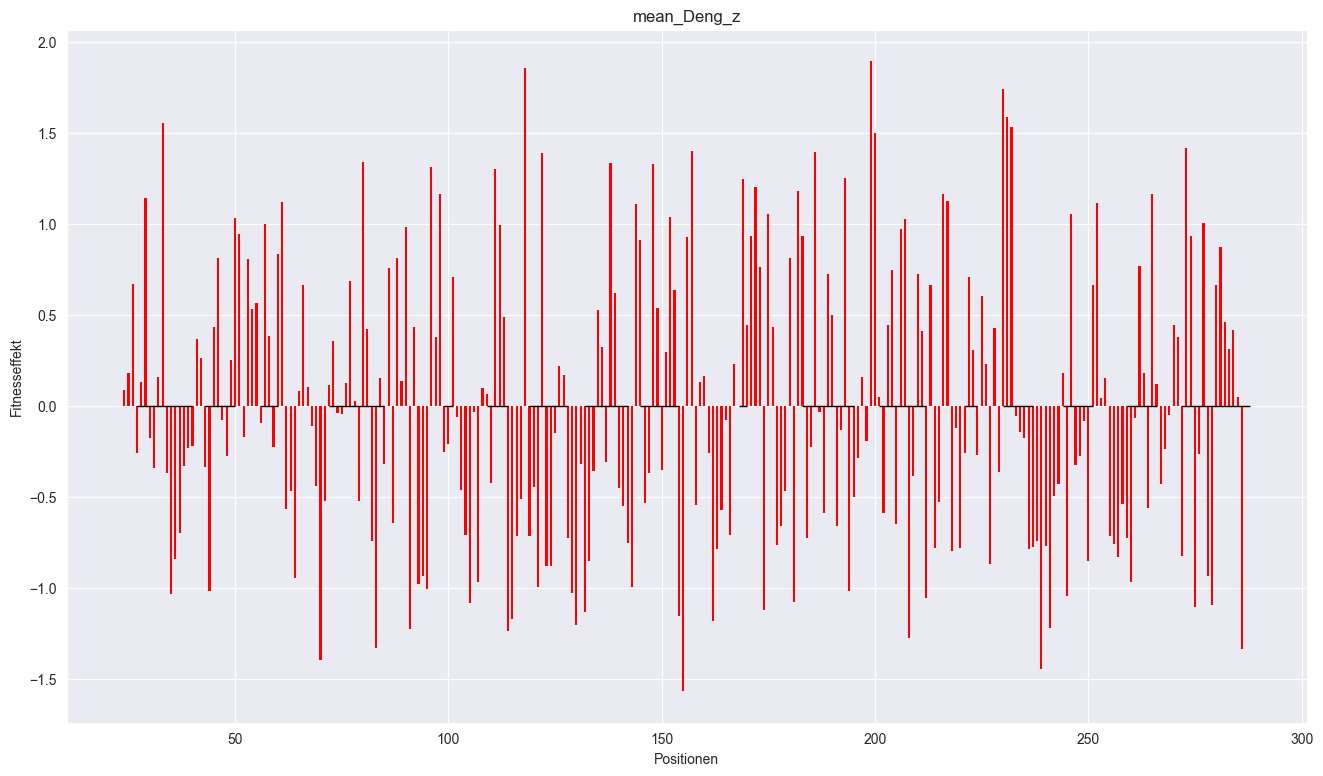

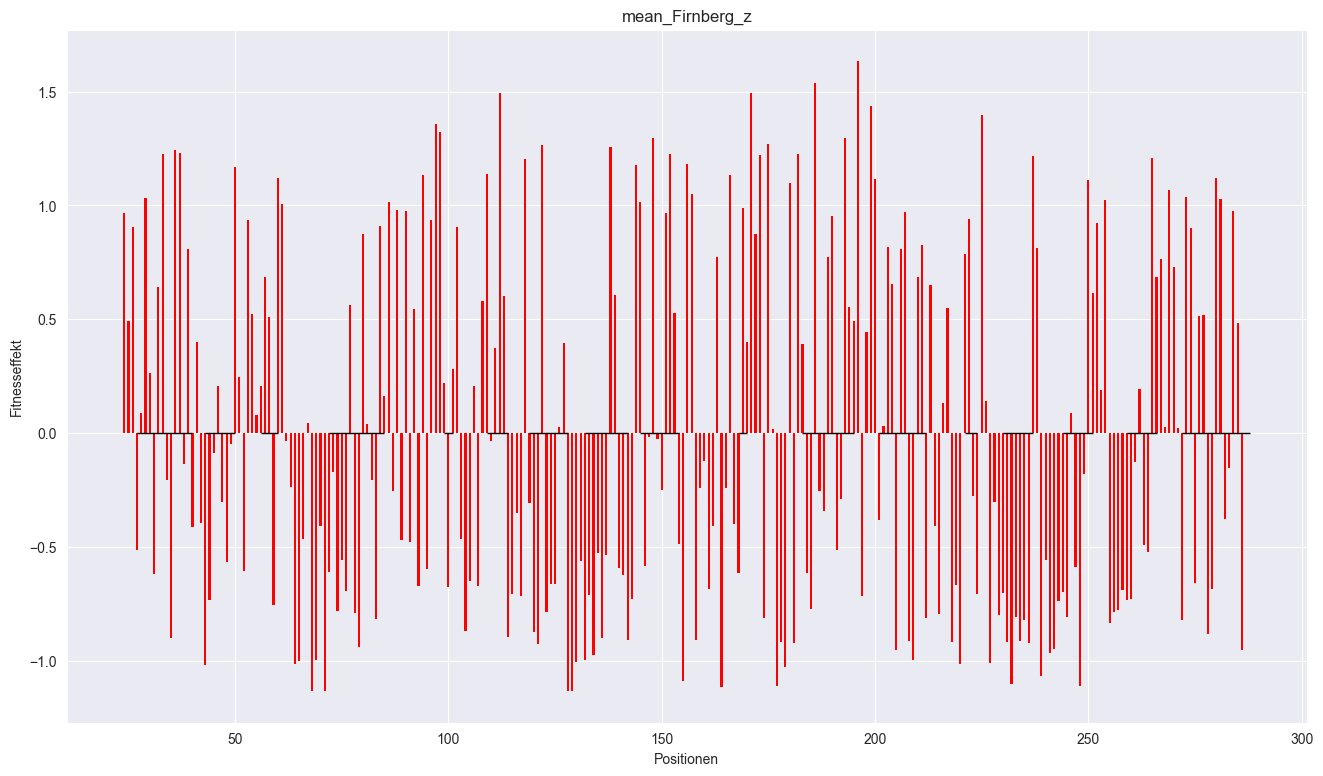

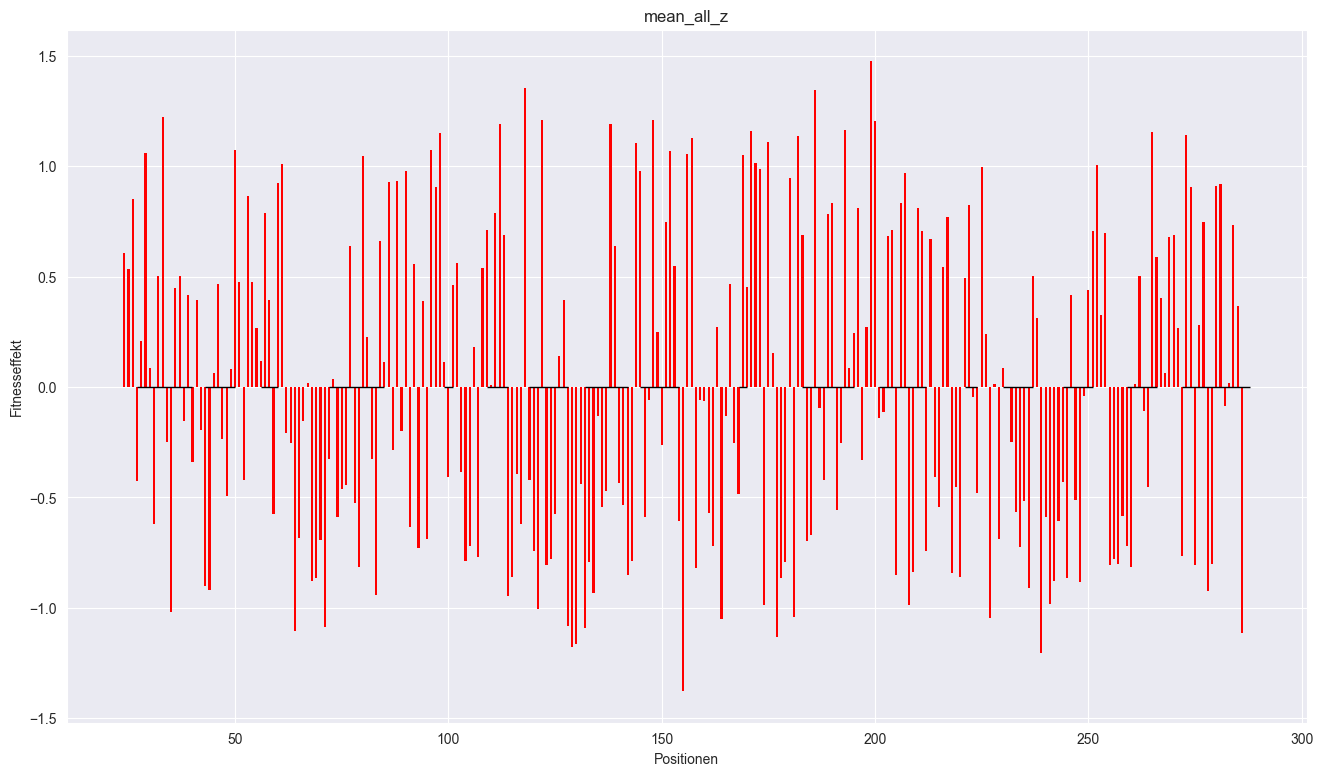

In [25]:
#nochmal mit strukturelementen zum vgl.
import pickle
with open('structural_elements_df.pkl', 'rb') as f:
    structural_elements = pickle.load(f)



width = []
left = []
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start)

for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.barh(0 , width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    plt.show()

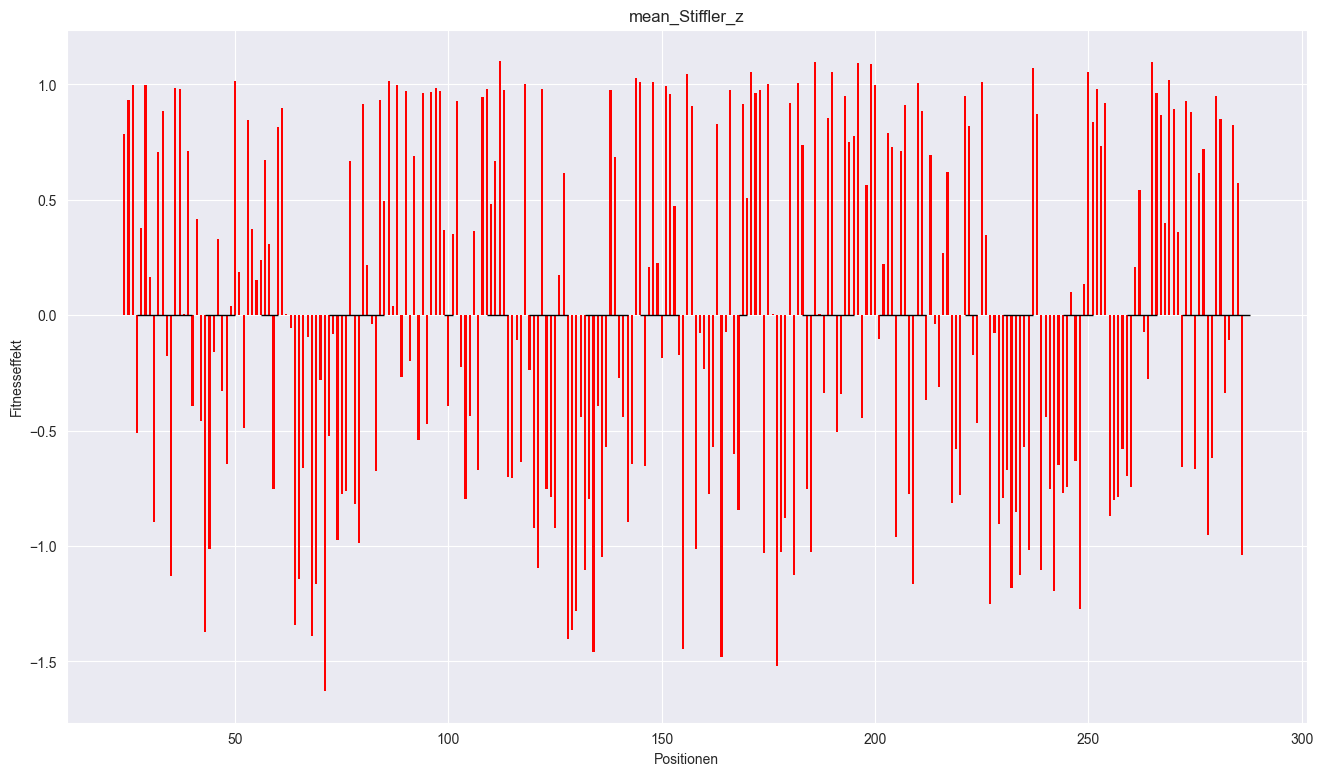

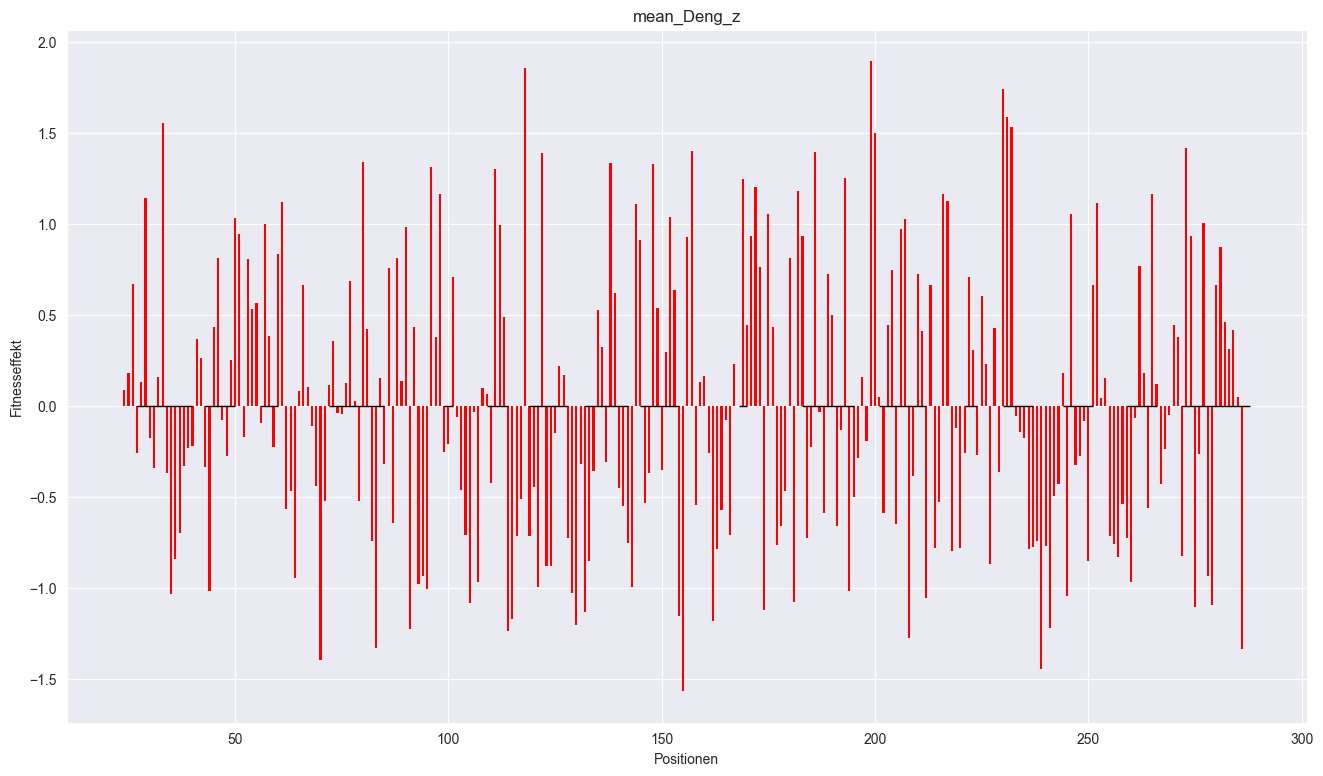

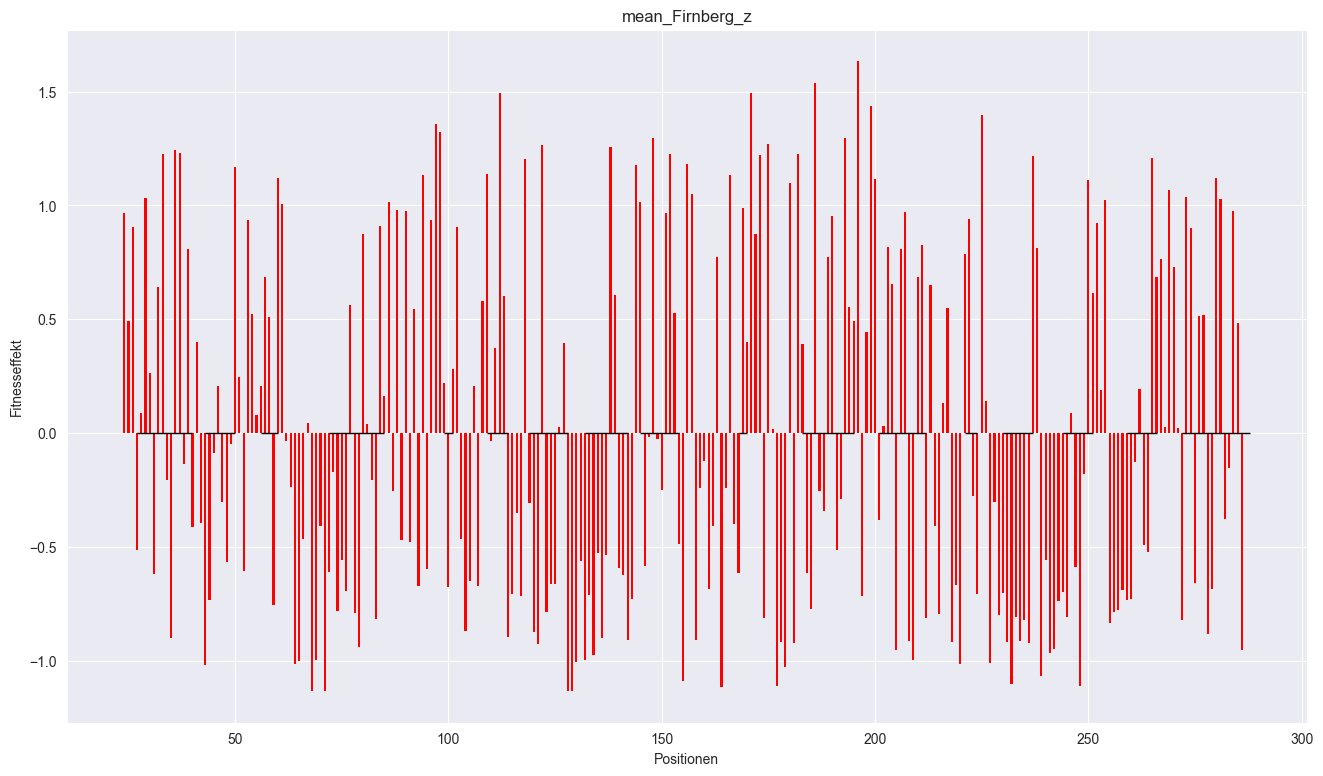

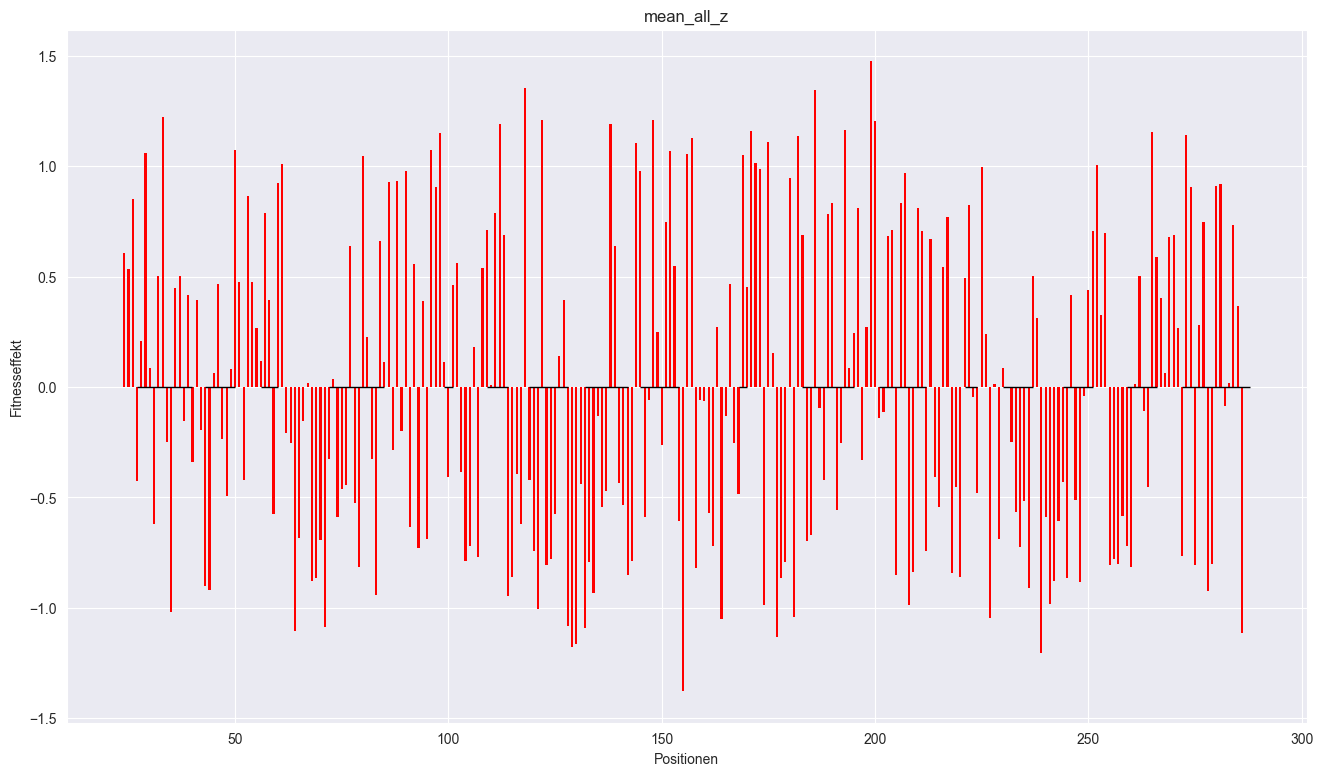

In [26]:
#mit varianz als fehlerbalken:

width = []
left = []
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start)

for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.barh(0 , width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    plt.show()

In [27]:
#mal zum testen, wie sehr die DS "korrelieren"
from scipy.stats import wilcoxon
samples = position_means_Z.columns[[0,2,4]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)): #-1 damit nicht mean_all auch getestet wird
            sample1 = position_means_Z[samples[i]]
            sample2 = position_means_Z[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



Wilcoxon-Signed-Rank-Test: mean_Stiffler_z vs mean_Deng_z
Statistik: 16886.0, p-Wert: 0.7022661588619417
Wilcoxon-Signed-Rank-Test: mean_Stiffler_z vs mean_Firnberg_z
Statistik: 17277.0, p-Wert: 0.9476960900738653
Wilcoxon-Signed-Rank-Test: mean_Deng_z vs mean_Firnberg_z
Statistik: 16505.0, p-Wert: 0.4896740621305461


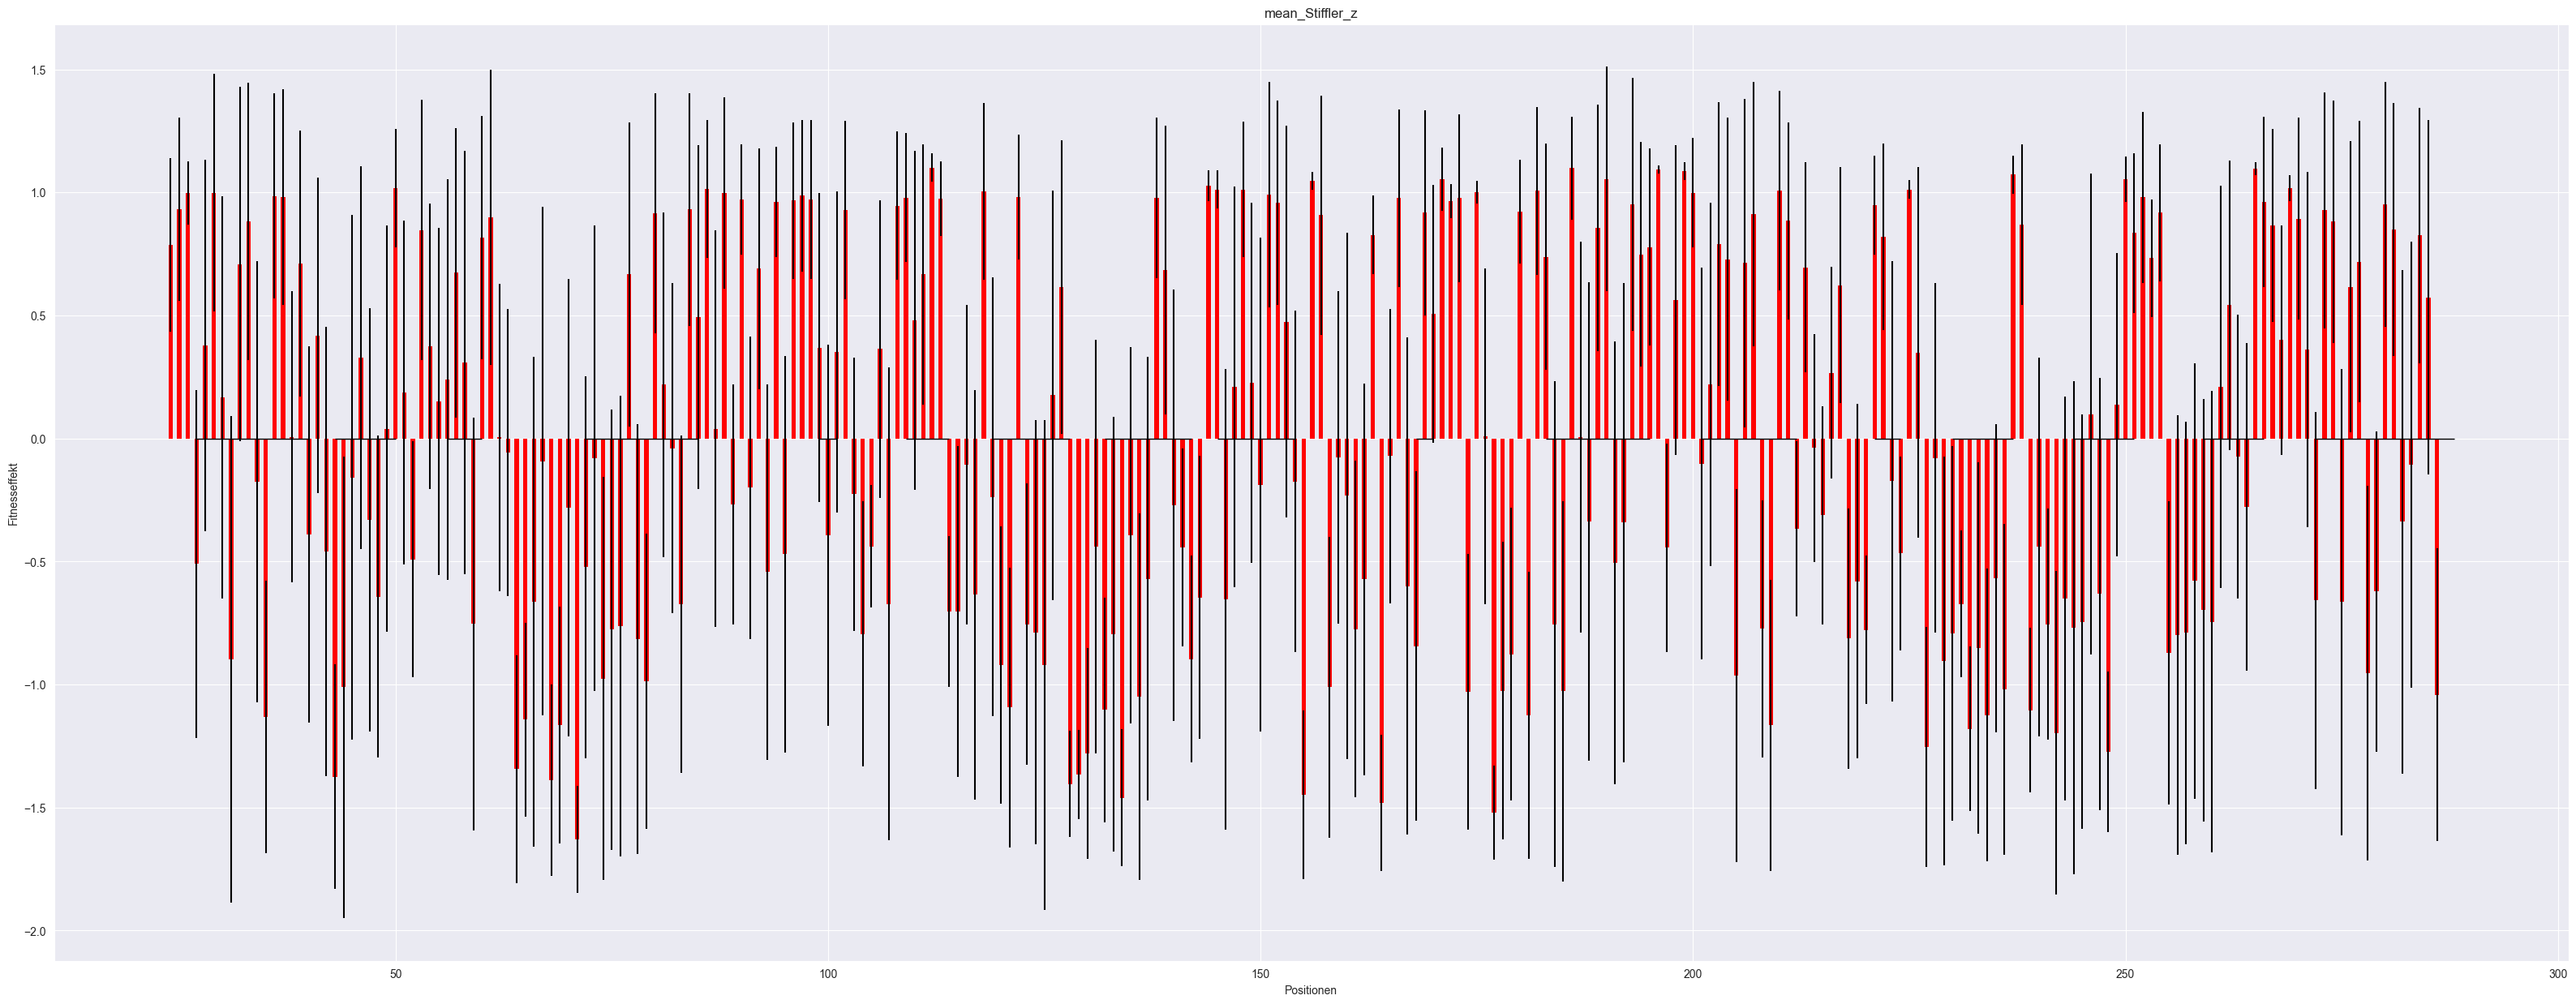

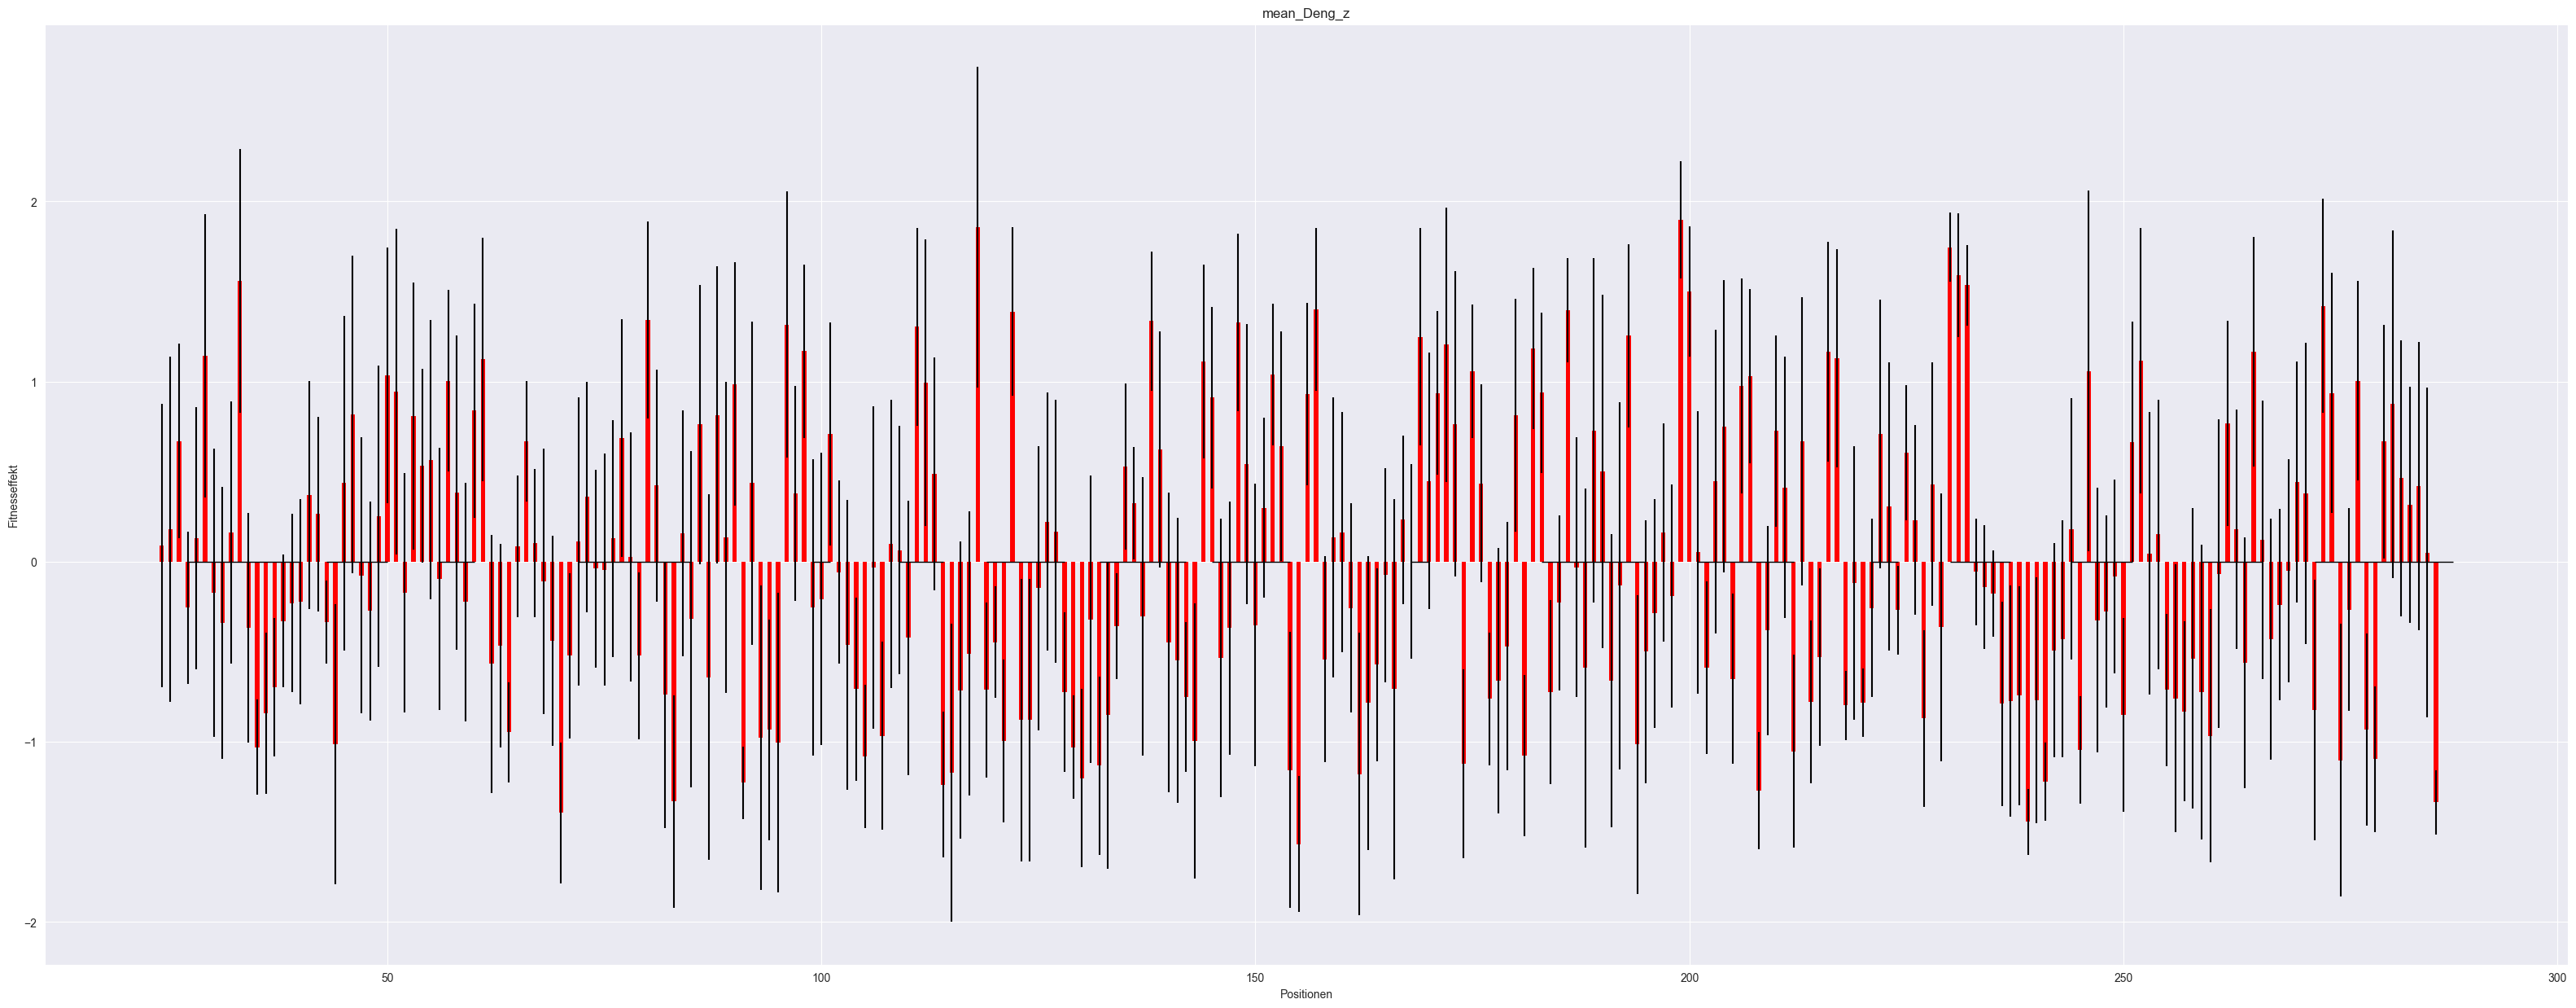

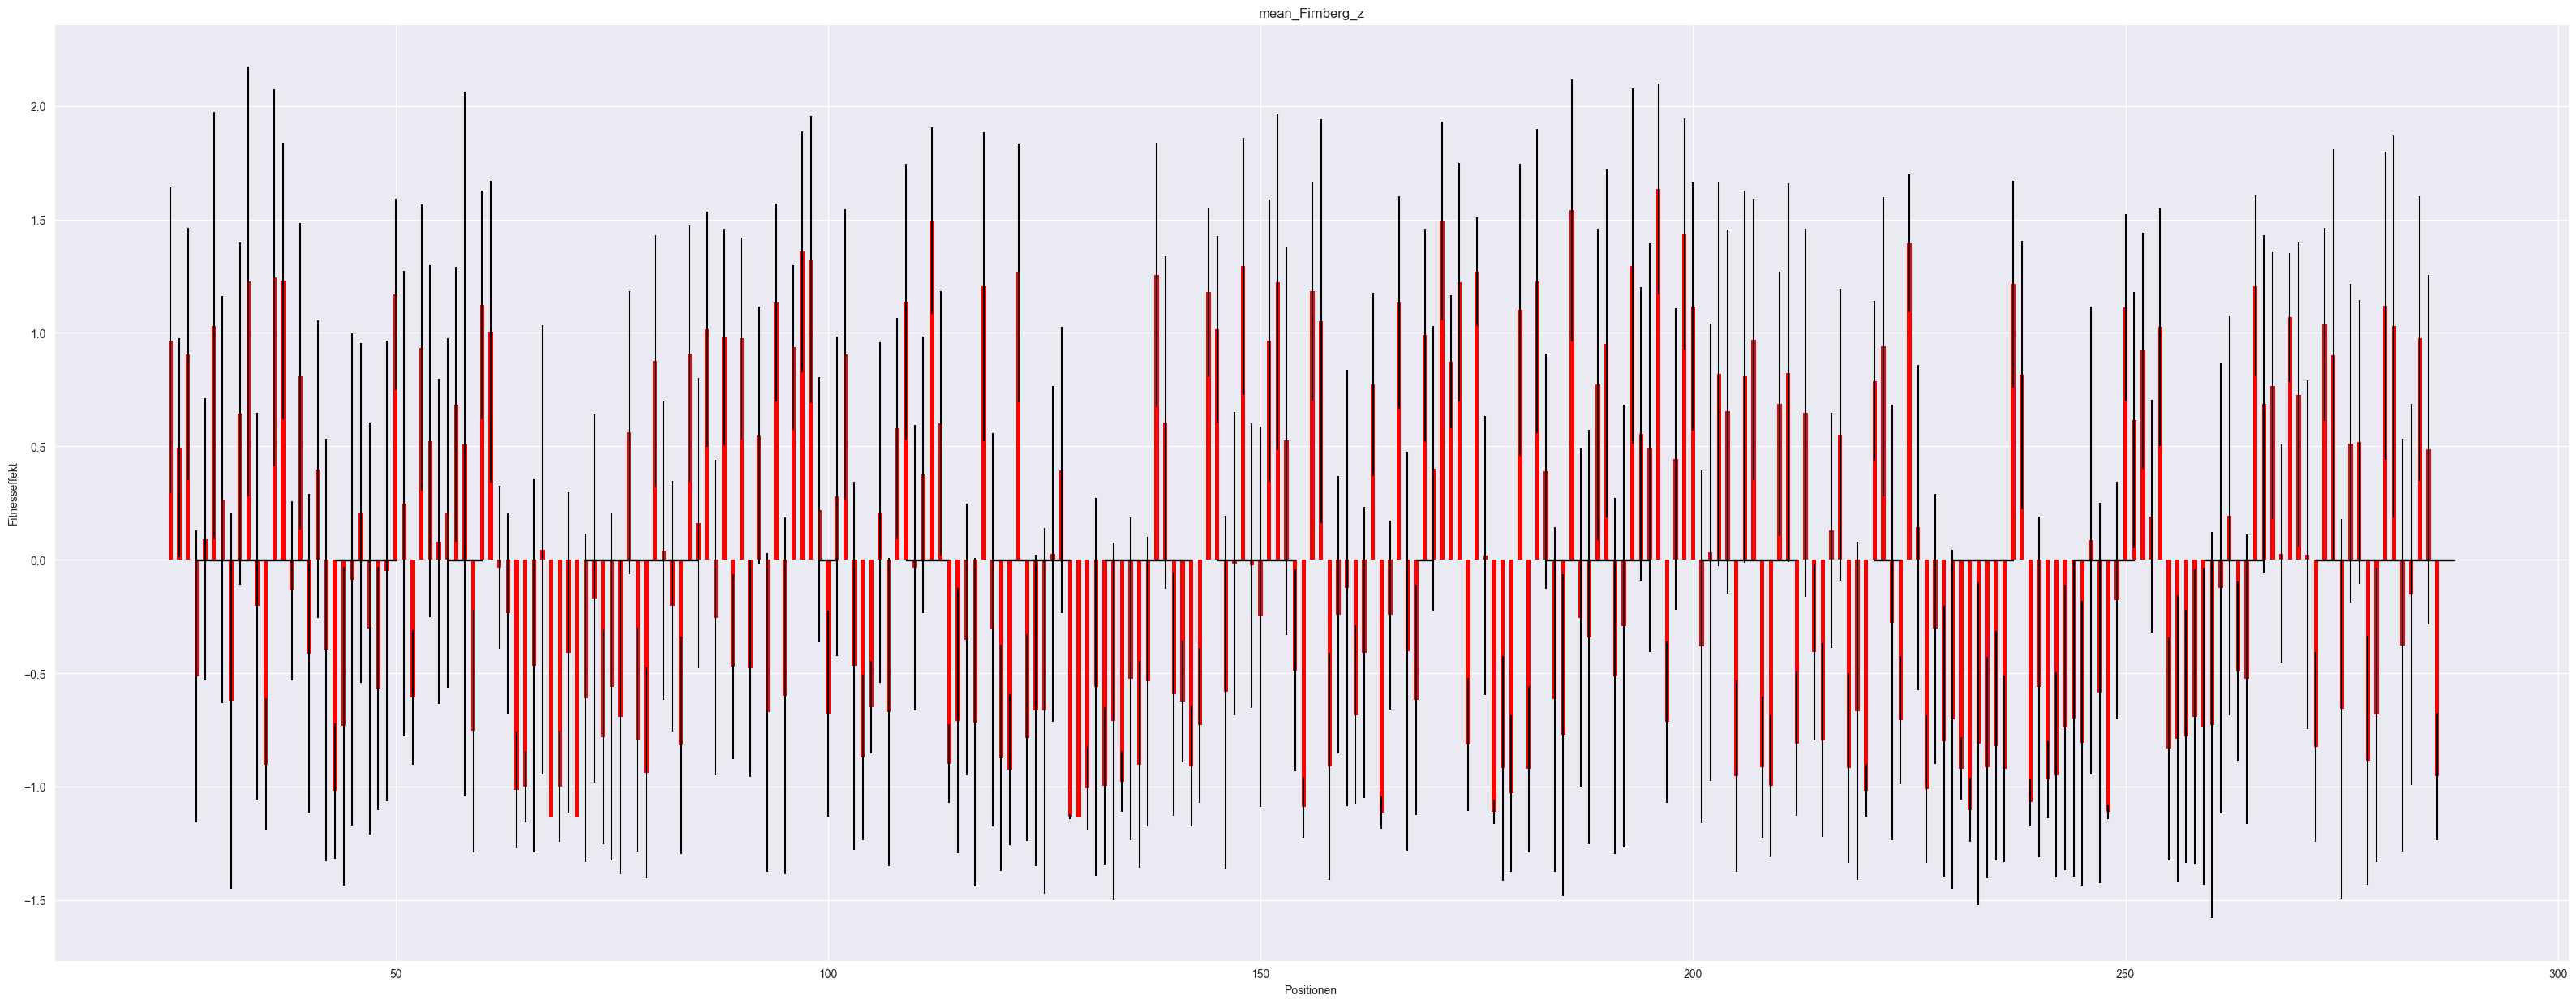

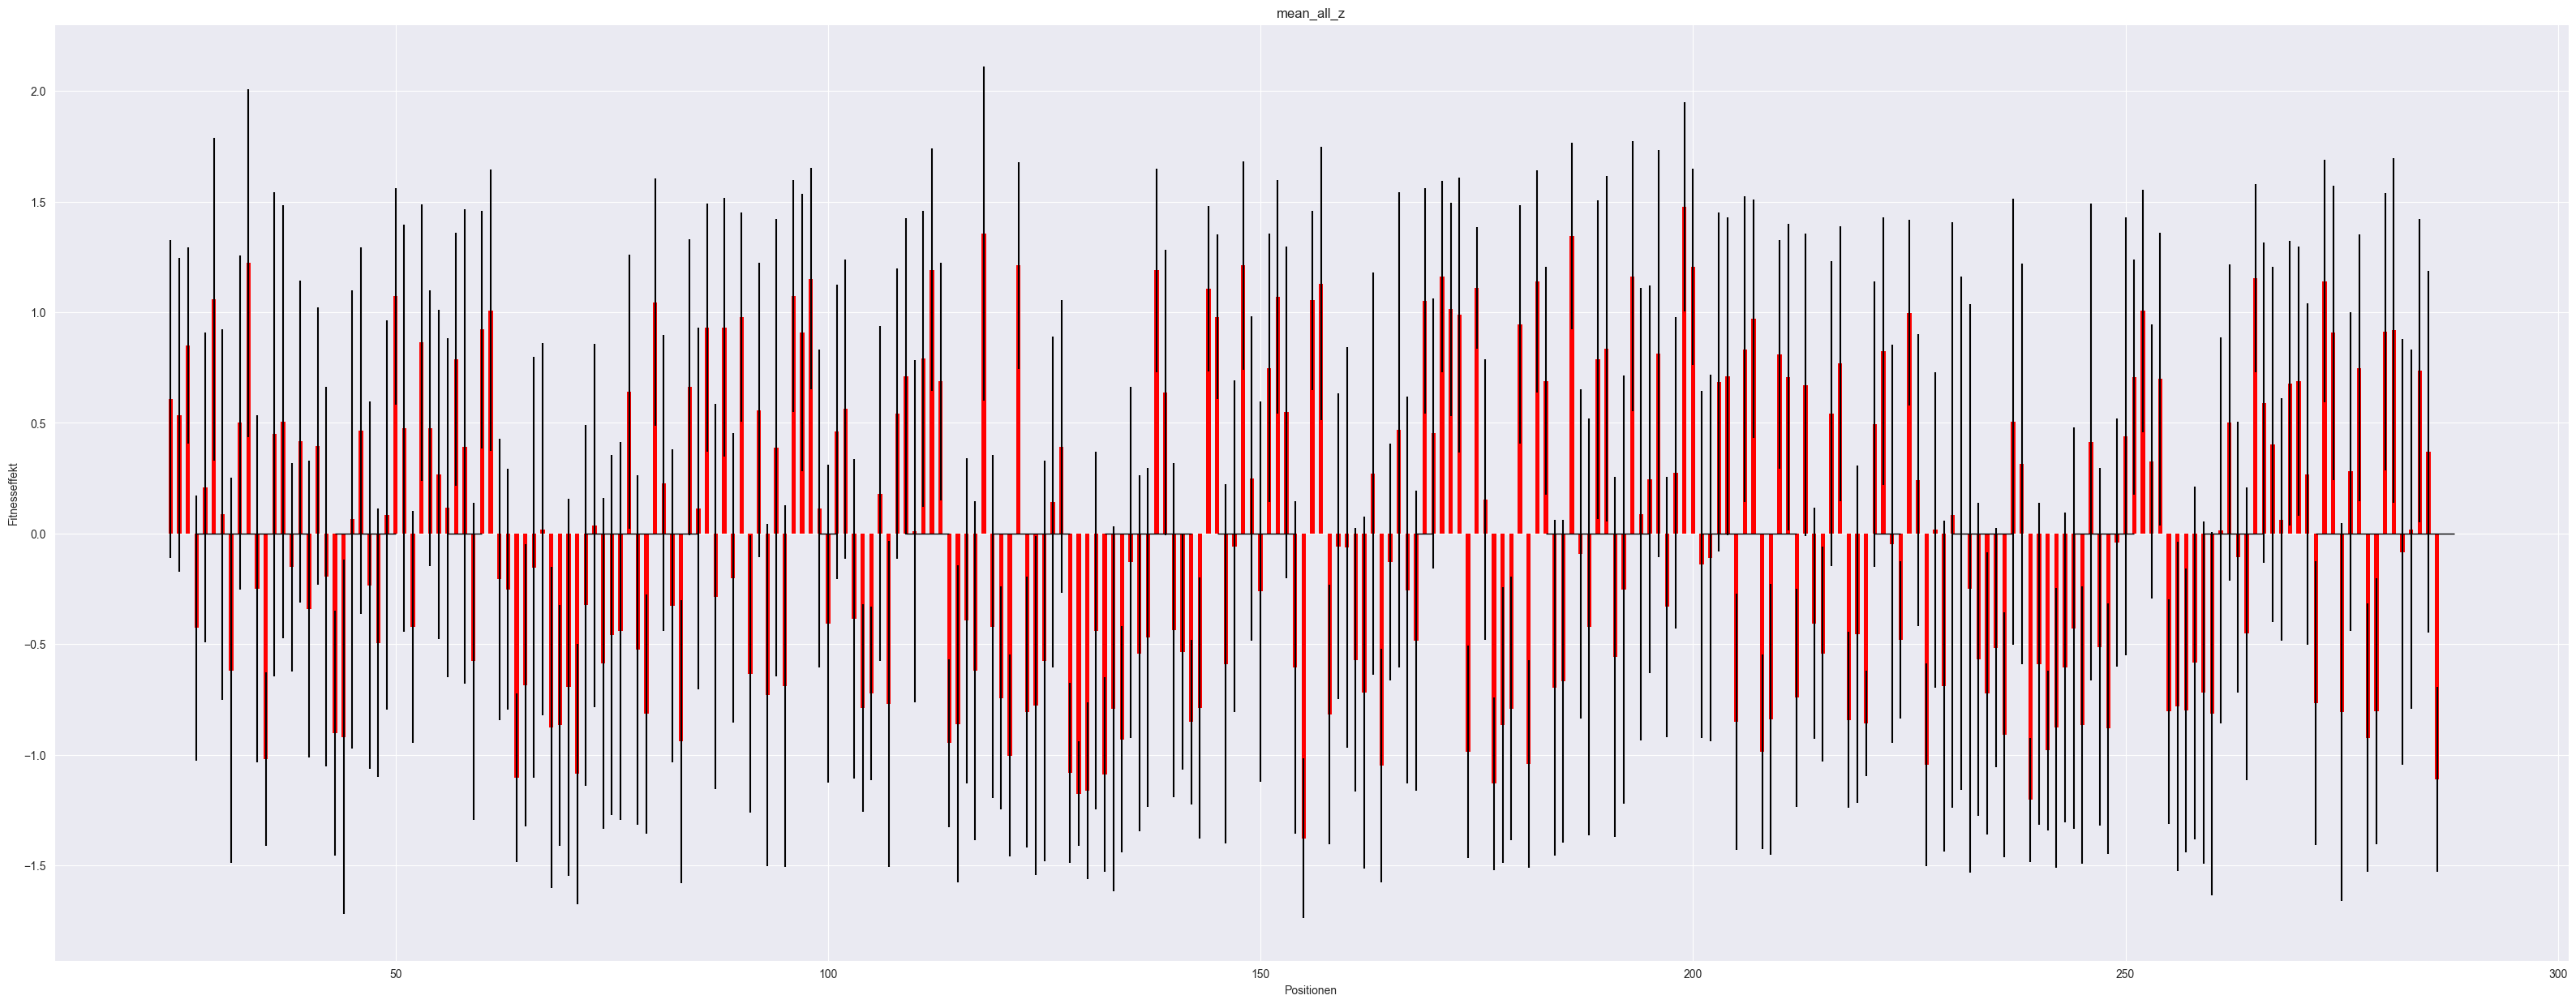

In [28]:
import numpy as np

width = []
left = []
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start)

for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index

    values_to_round = position_means_Z.iloc[:, j+1].apply(lambda x: round(x, 5))  # Werte auf 5 Nachkommastellen runden
    error_values = np.sqrt(values_to_round)  # Wurzel auf gerundete Werte anwenden

    plt.figure(figsize=(40,15))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0, yerr=error_values)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.barh(0 , width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    plt.show()


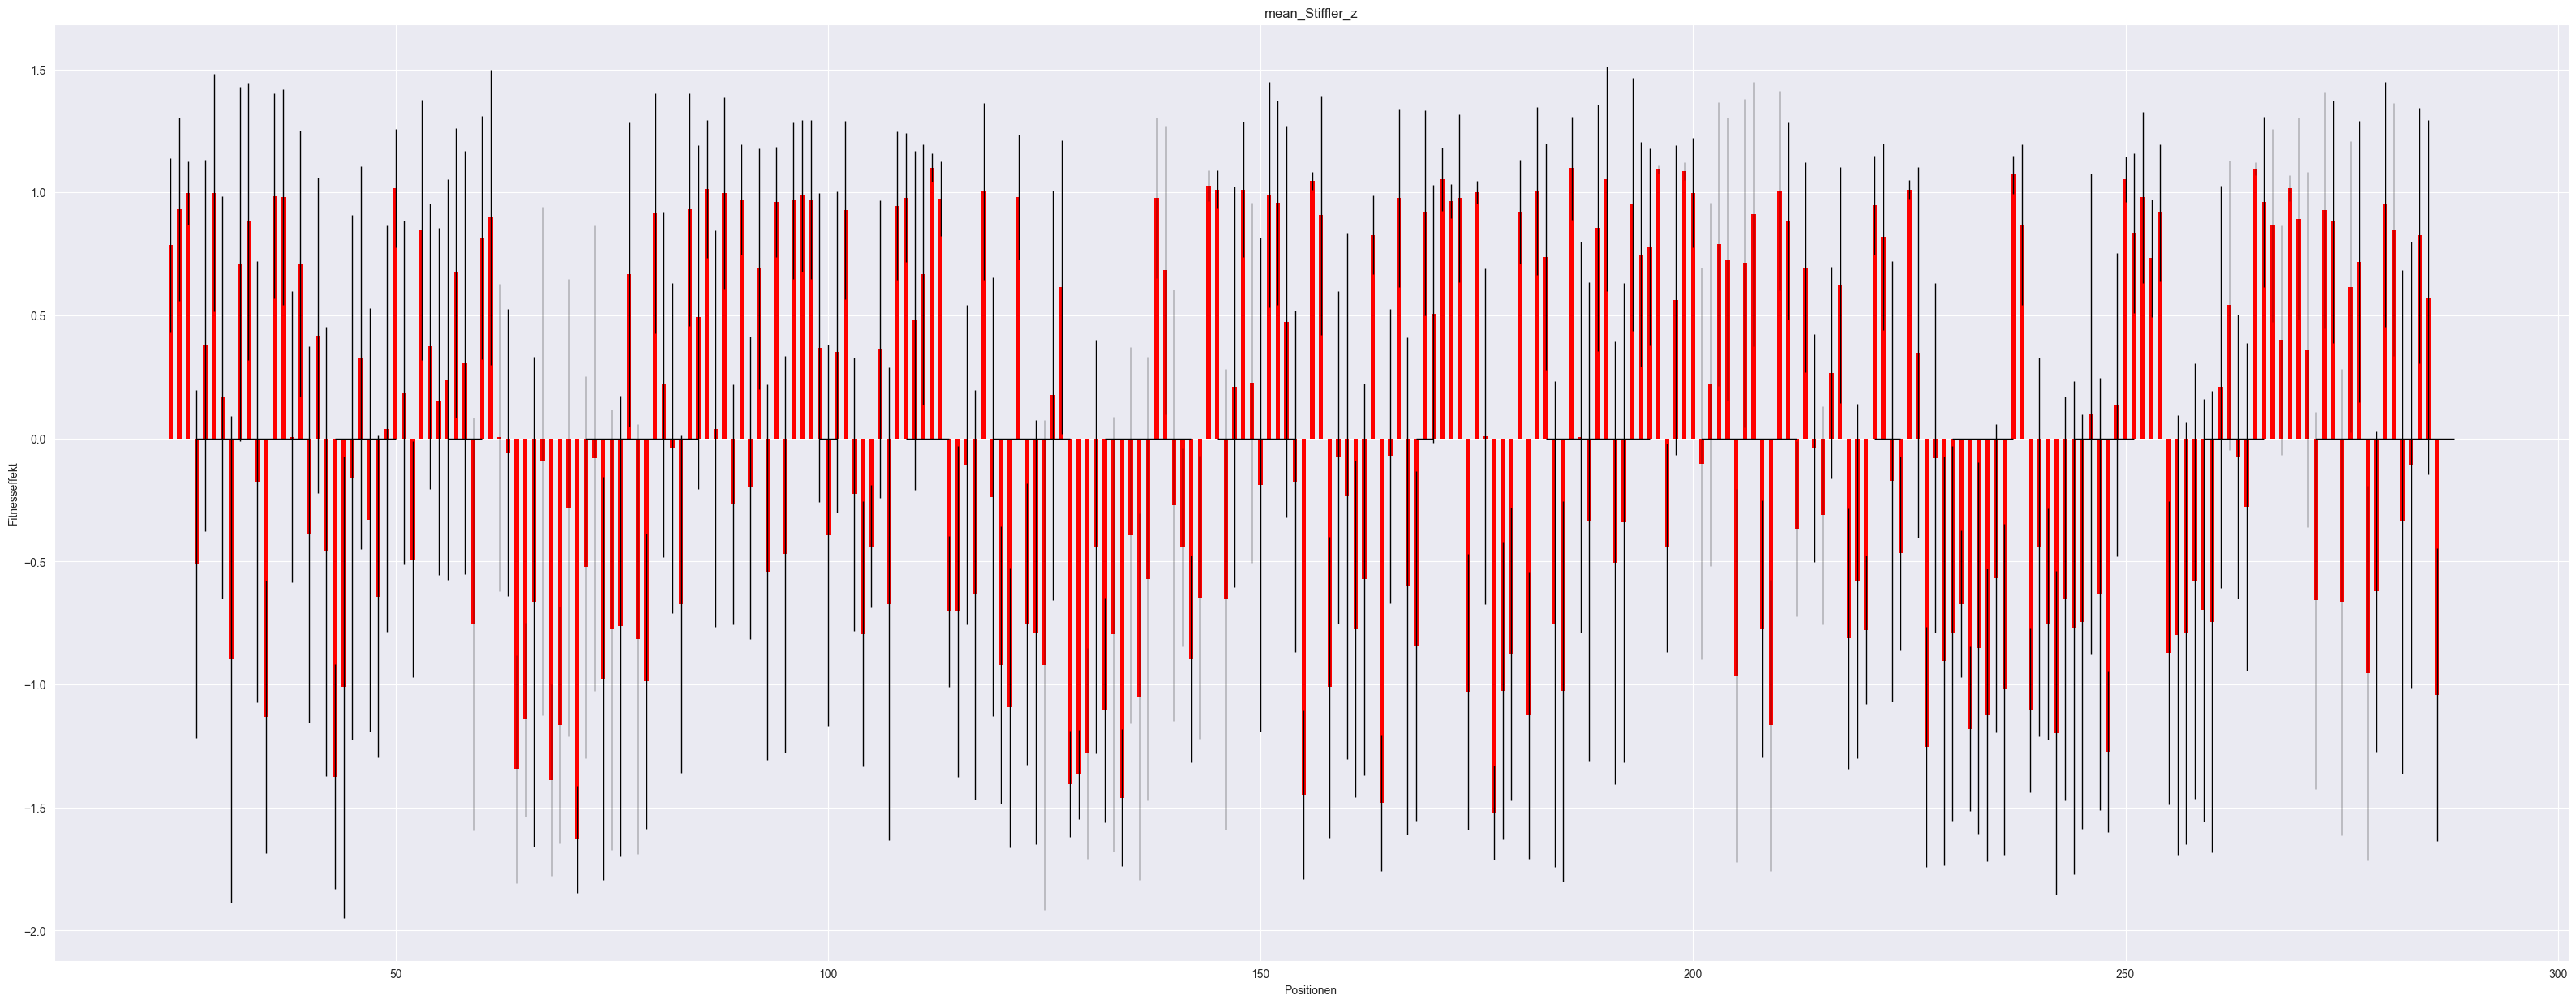

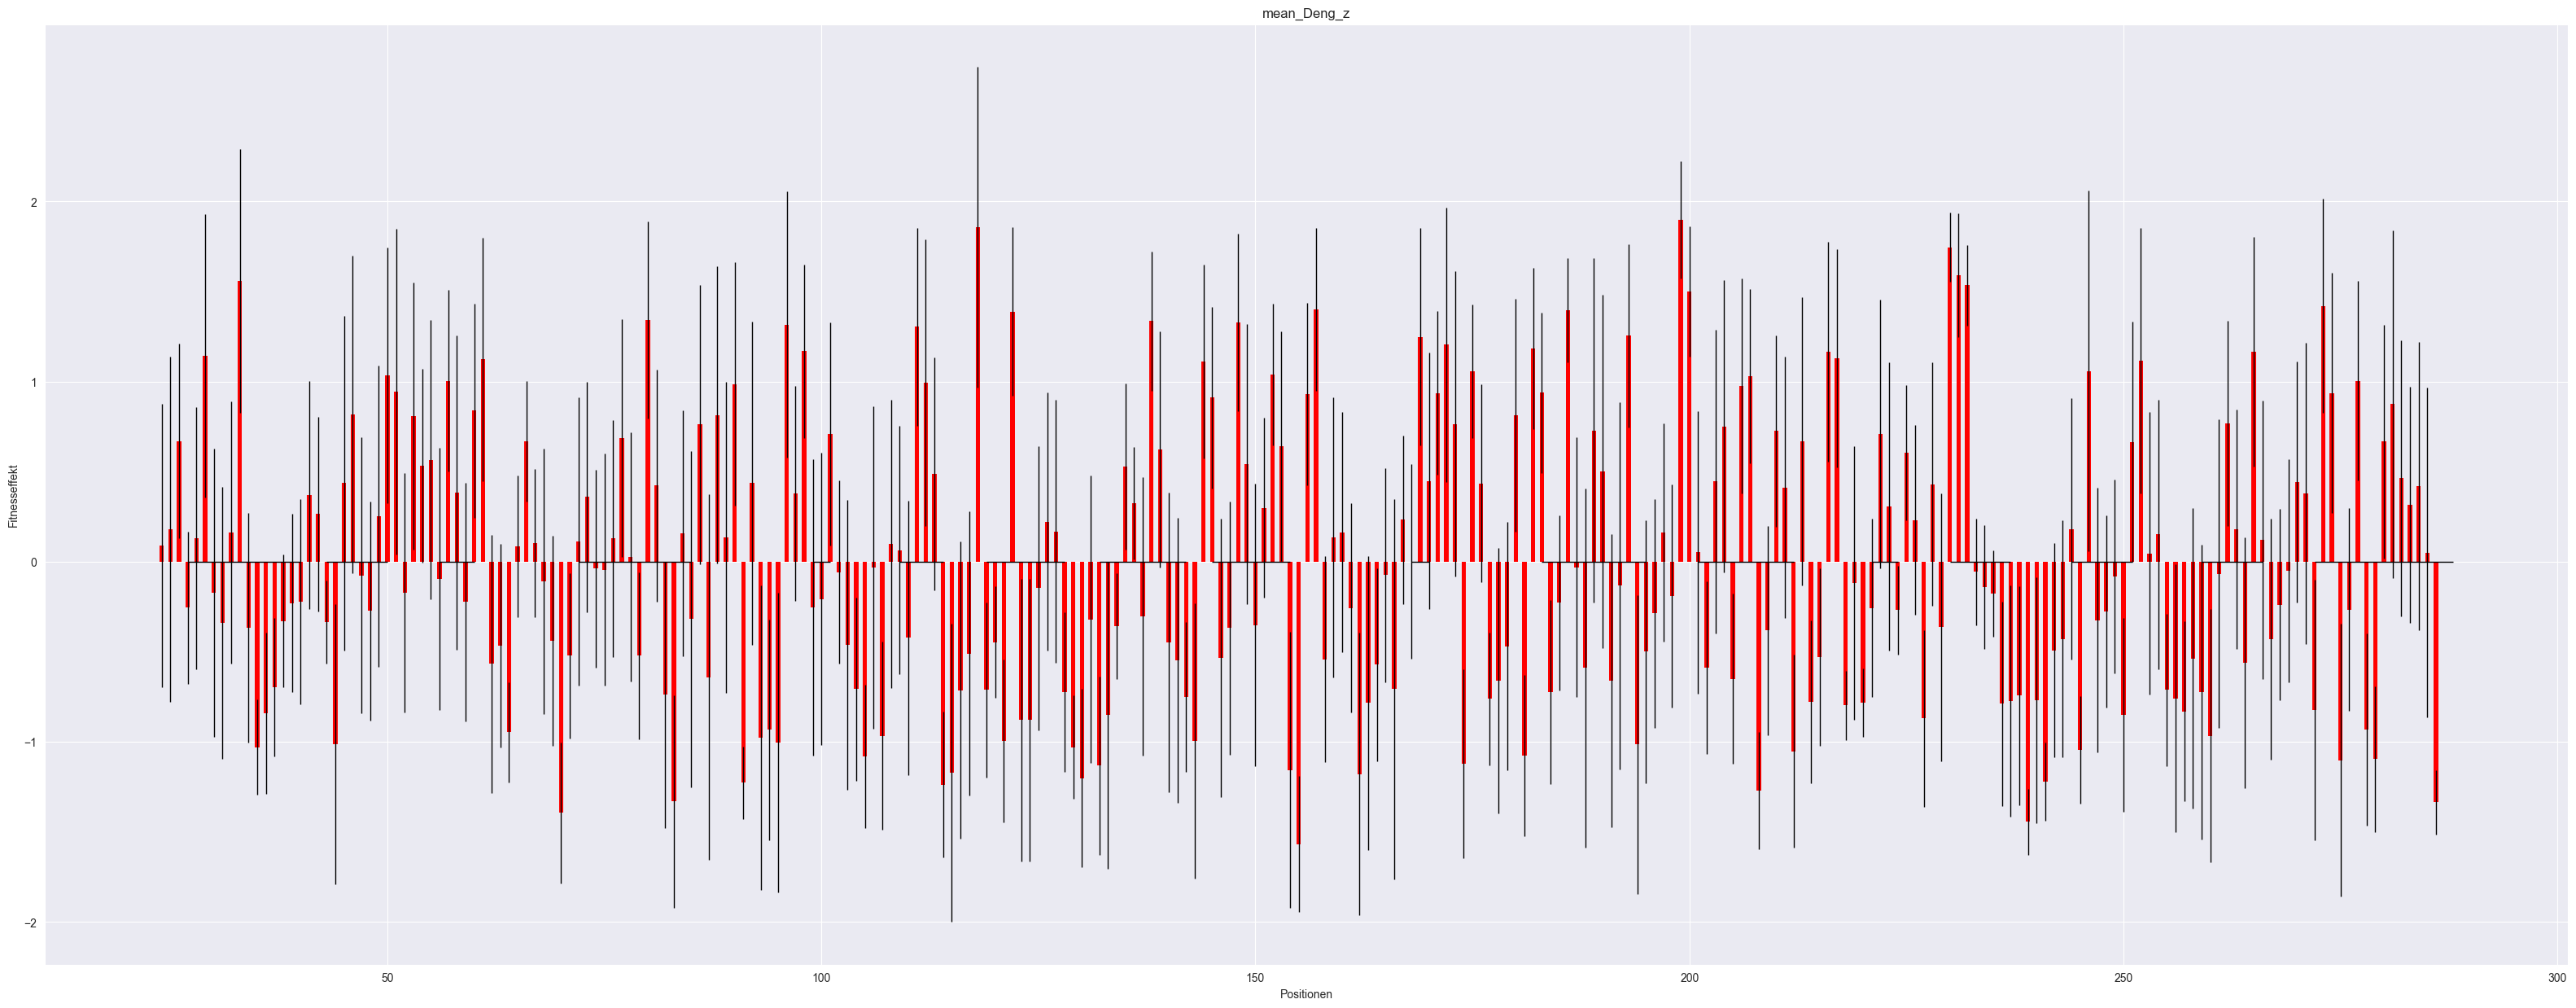

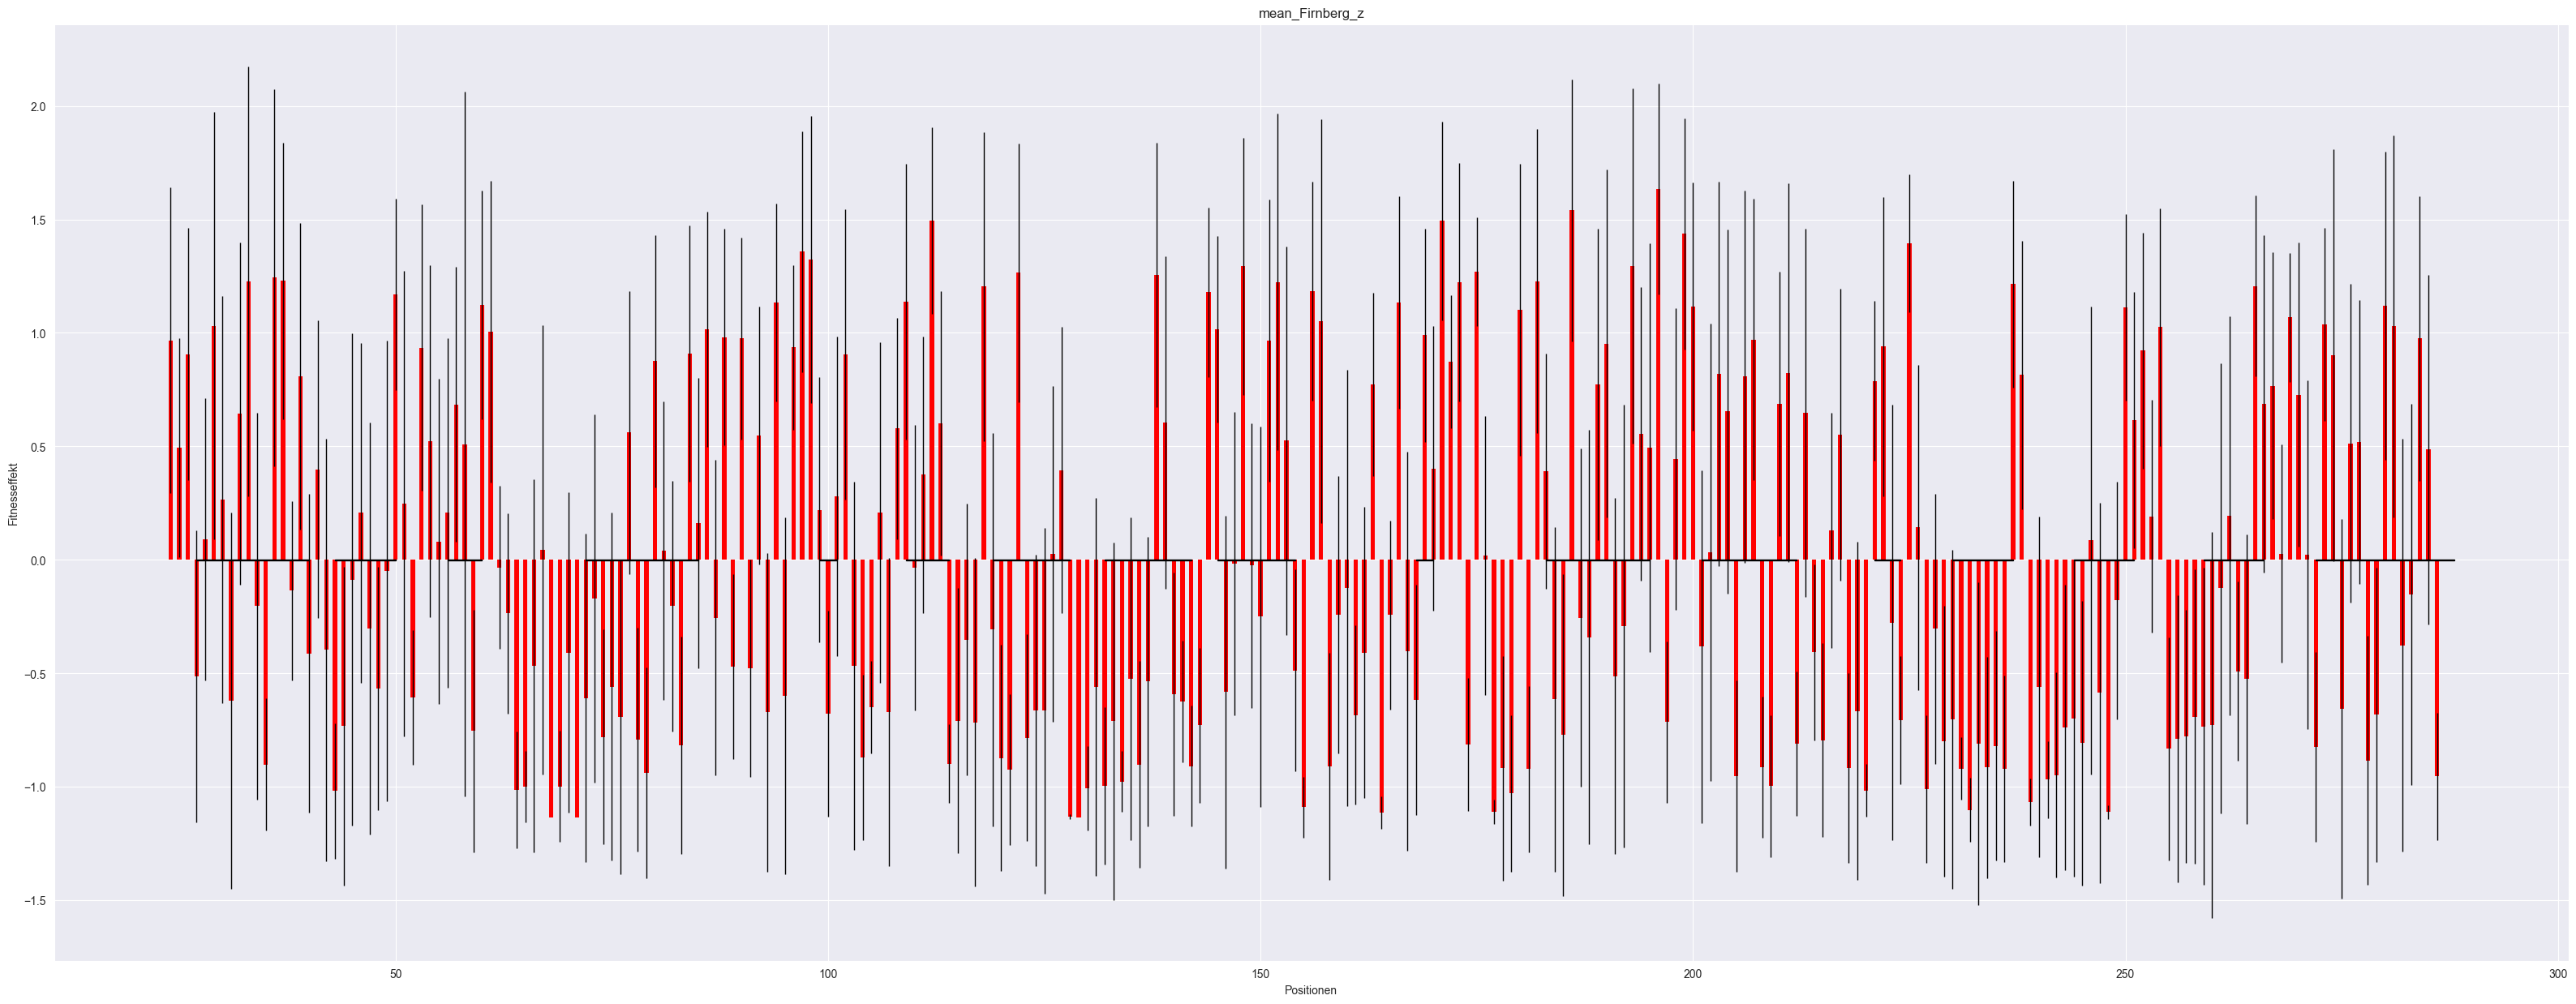

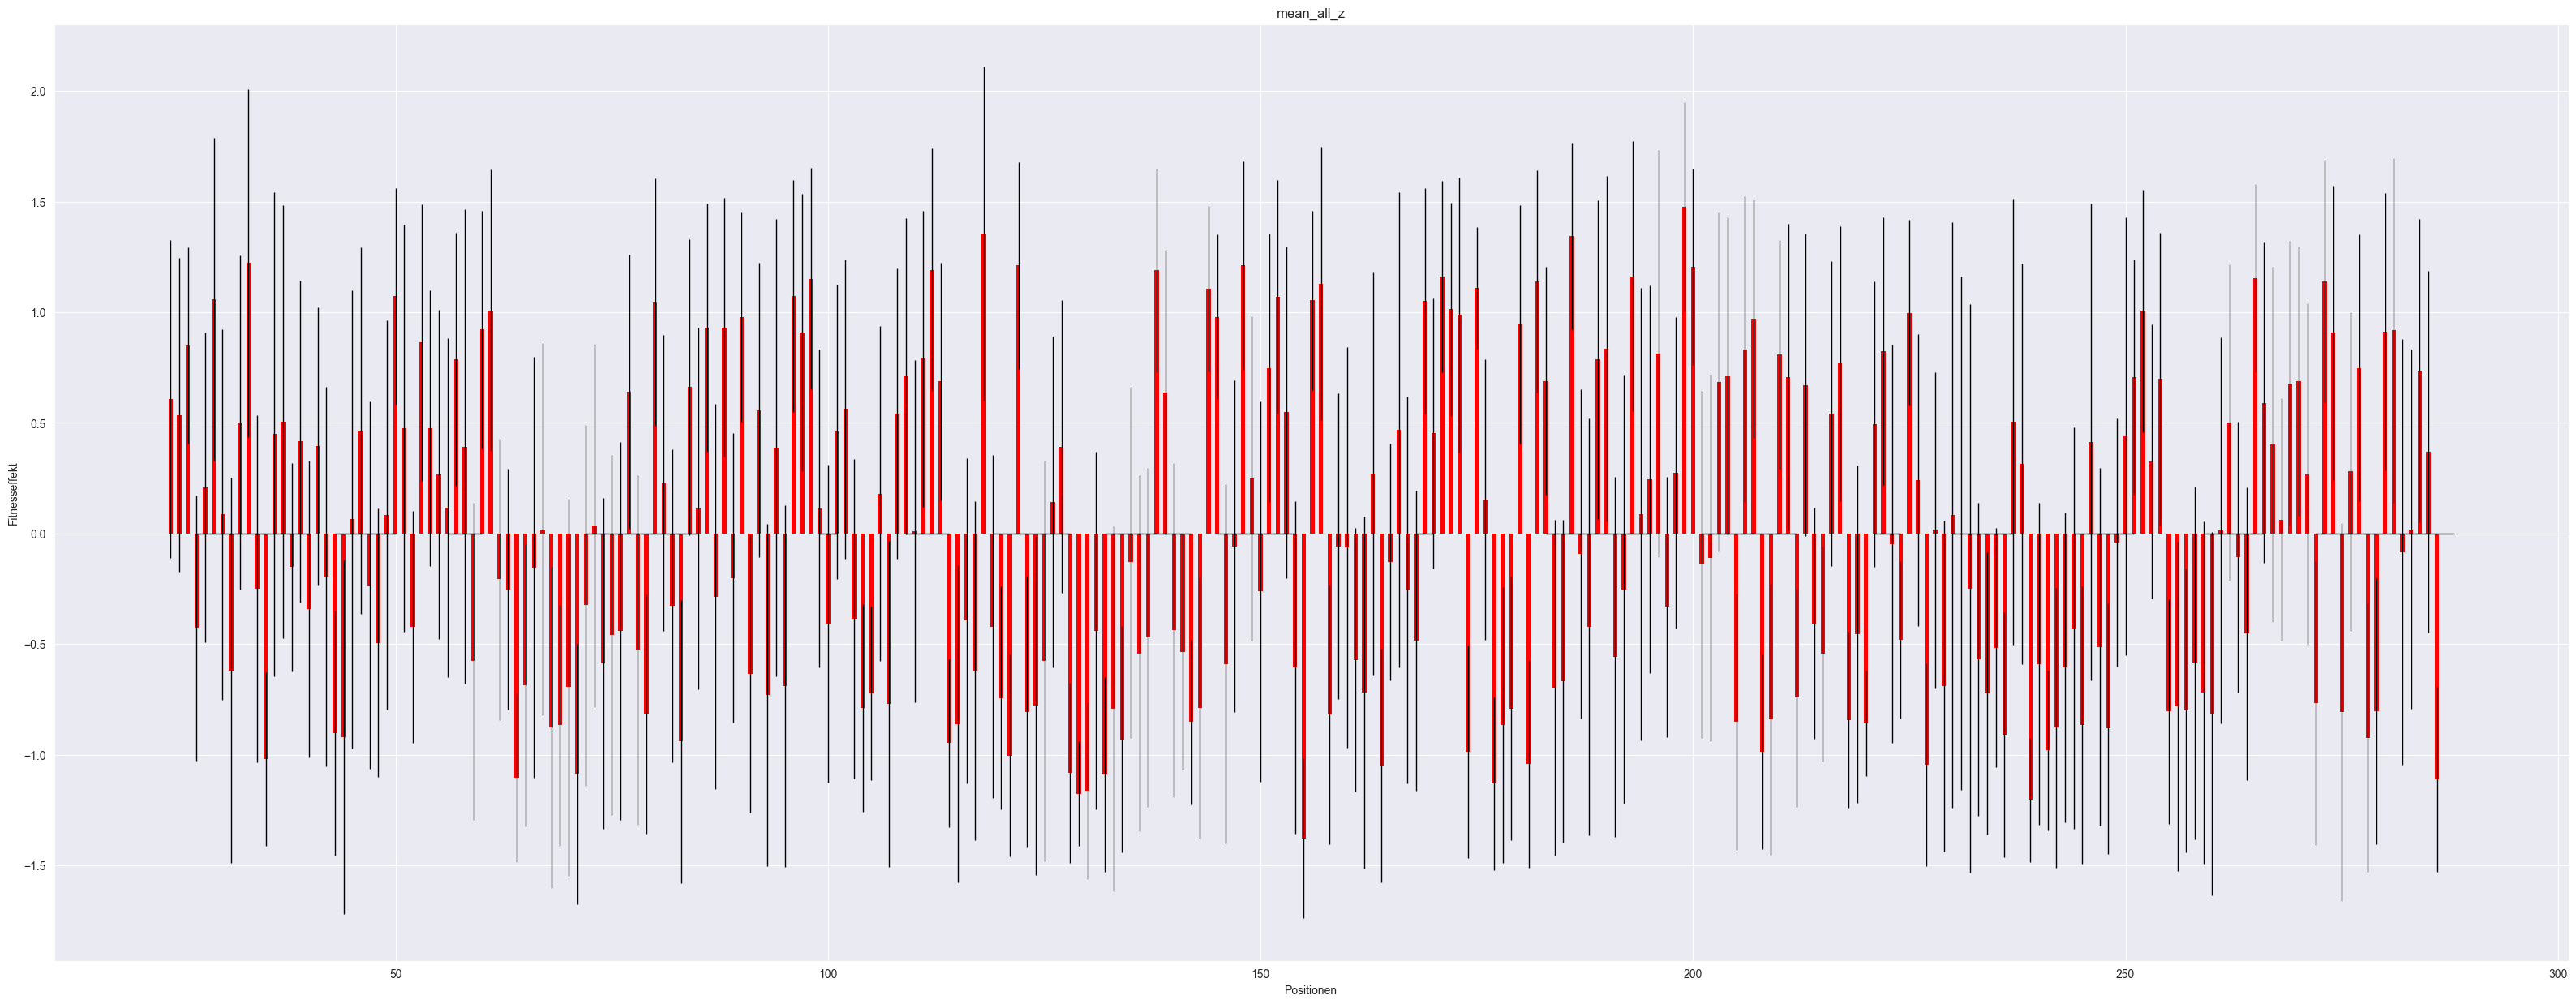

In [29]:
import numpy as np

width = []
left = []
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start)

for i in range(0, len(position_means_Z.columns)//2):
    j = i * 2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index

    values_to_round = position_means_Z.iloc[:, j+1].apply(lambda x: round(x, 5))  # Werte auf 5 Nachkommastellen runden
    error_values = np.sqrt(values_to_round)  # Wurzel auf gerundete Werte anwenden

    plt.figure(figsize=(40, 15))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.errorbar(xwerte, ywerte, yerr=error_values, fmt='none', ecolor='black', elinewidth=1.0, alpha=1)  # elinewidth auf 0.5 setzen
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.barh(0, width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    plt.show()

In [30]:
position_means_Z

mean_Stiffler_z var_Stiffler_z mean_Deng_z var_Deng_z  \
Position                                                         
24              0.786898       0.125082    0.089304   0.617338   
25              0.932237       0.139314    0.180497   0.917549   
26              0.998662        0.01663    0.670128   0.291014   
27             -0.510157        0.50198   -0.255614   0.177461   
28              0.377421       0.571262    0.132612   0.529266   
...                  ...            ...         ...        ...   
282            -0.337803       1.046659    0.463454    0.58649   
283            -0.106276       0.819396     0.31609   0.431554   
284             0.824699       0.271089    0.420258   0.642744   
285              0.57407       0.518326    0.050248   0.837884   
286            -1.041095       0.354228   -1.334869   0.031742   

         mean_Firnberg_z var_Firnberg_z mean_all_z var_all_z  
Position                                                      
24              0.966881       0.453596    0.60771  0.518624  
25               0.49345       0.232222   0.535395  0.502145  
26              0.906685       0.308594   0.849455  0.195452  
27             -0.514142       0.413599  -0.426638  0.359798  
28              0.090621       0.385542    0.20849  0.491832  
...                  ...            ...        ...       ...  
282            -0.376808       0.826386  -0.083719  0.926648  
283            -0.152312       0.704399   0.019167  0.661913  
284             0.974941       0.393654    0.73577  0.468079  
285             0.486125       0.591881   0.368077  0.668752  
286            -0.953817       0.078933  -1.112715  0.174624  

[263 rows x 8 columns]

In [31]:
#look at tops:
top_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
top_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in top_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = top_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    top_25_DSlist.append(new_DS)
top_25_DSlist

for i in range(0, len(top_25_DSlist)):
    t=top_25_DSlist[i].quantile(0.75)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    top_25_DSlist[i].iloc[:,0] = top_25_DSlist[i].iloc[:,0] >= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

#look at bottoms:
bottom_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
bottom_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in bottom_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = bottom_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    bottom_25_DSlist.append(new_DS)
bottom_25_DSlist

for i in range(0, len(bottom_25_DSlist)):
    t=bottom_25_DSlist[i].quantile(0.25)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    bottom_25_DSlist[i].iloc[:,0] = bottom_25_DSlist[i].iloc[:,0] <= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

In [32]:
top_25_DSlist

[      Stiffler  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
         Deng  Position
 H24C   False        24
 H24Y   False        24
 H24W   False        24
 H24V   False        24
 H24T   False        24
 ...      ...       ...
 W286G  False       286
 W286F  False       286
 W286E  False       286
 W286C  False       286
 W286A  False       286
 
 [4996 rows x 2 columns],
       Firnberg  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
    

In [33]:
#Positionsefekt von 0 bis 1:
top_25_DSlist_poseff=[]
for i in range (0, len(top_25_DSlist)):
    x=top_25_DSlist[i].iloc[:,0].groupby(top_25_DSlist[i].iloc[:,1])
    top_25_DSlist_poseff.append(x.mean()) #Durchschnitt der Werte in der Fitness-Value Spate (T or F, je nachdem ob Wert über oder unter Treshhold war) für jede Position. Ein Durchschnitt von 1 würde bedeuten, dass alle Mutanten True wären, also < Treshhold sind. So werden Positionen mit wenigen Mutanten nicht übersehen.

    bottom_25_DSlist_poseff=[]
for i in range (0, len(bottom_25_DSlist)):
    x=bottom_25_DSlist[i].iloc[:,0].groupby(bottom_25_DSlist[i].iloc[:,1])
    bottom_25_DSlist_poseff.append(x.mean())

In [34]:
top_25_DSlist_poseff

[Position
 24     0.388889
 25     0.578947
 26     0.578947
 27     0.052632
 28     0.263158
          ...   
 282    0.157895
 283    0.052632
 284    0.473684
 285    0.105263
 286         0.0
 Name: Stiffler, Length: 263, dtype: object,
 Position
 24     0.111111
 25     0.368421
 26     0.421053
 27     0.052632
 28     0.157895
          ...   
 282    0.315789
 283    0.263158
 284    0.421053
 285    0.210526
 286         0.0
 Name: Deng, Length: 263, dtype: object,
 Position
 24     0.555556
 25     0.157895
 26     0.315789
 27     0.052632
 28     0.105263
          ...   
 282    0.157895
 283    0.105263
 284    0.526316
 285    0.210526
 286         0.0
 Name: Firnberg, Length: 263, dtype: object,
 Position
 24     0.444444
 25     0.263158
 26     0.473684
 27     0.052632
 28     0.157895
          ...   
 282    0.210526
 283    0.210526
 284    0.526316
 285    0.263158
 286         0.0
 Name: mean, Length: 263, dtype: object]

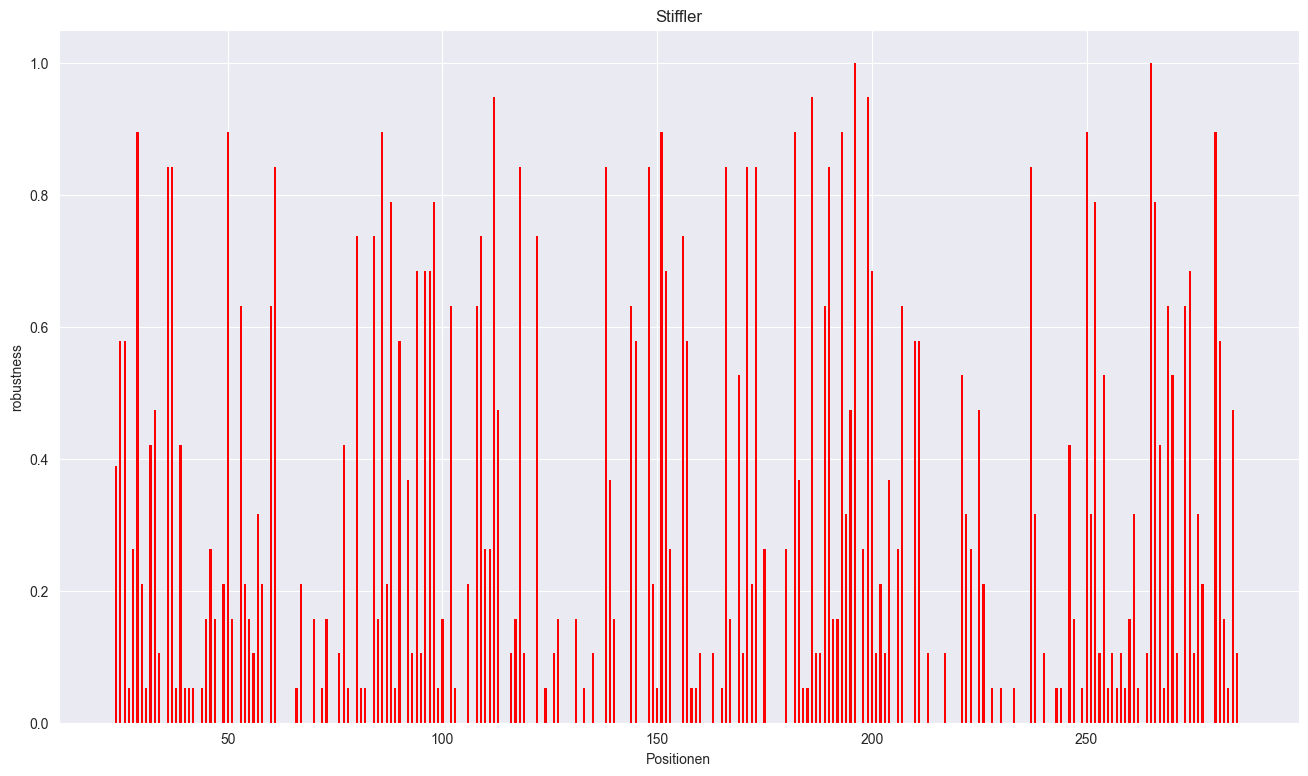

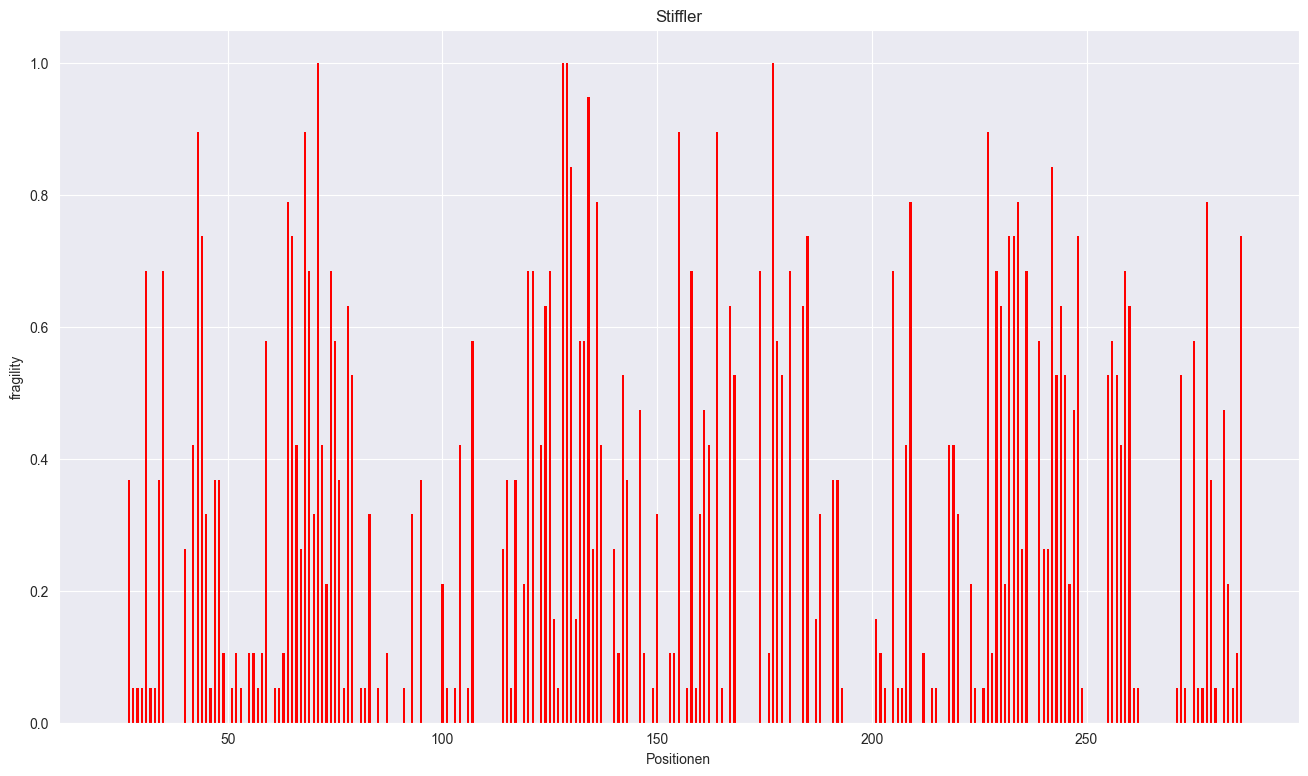

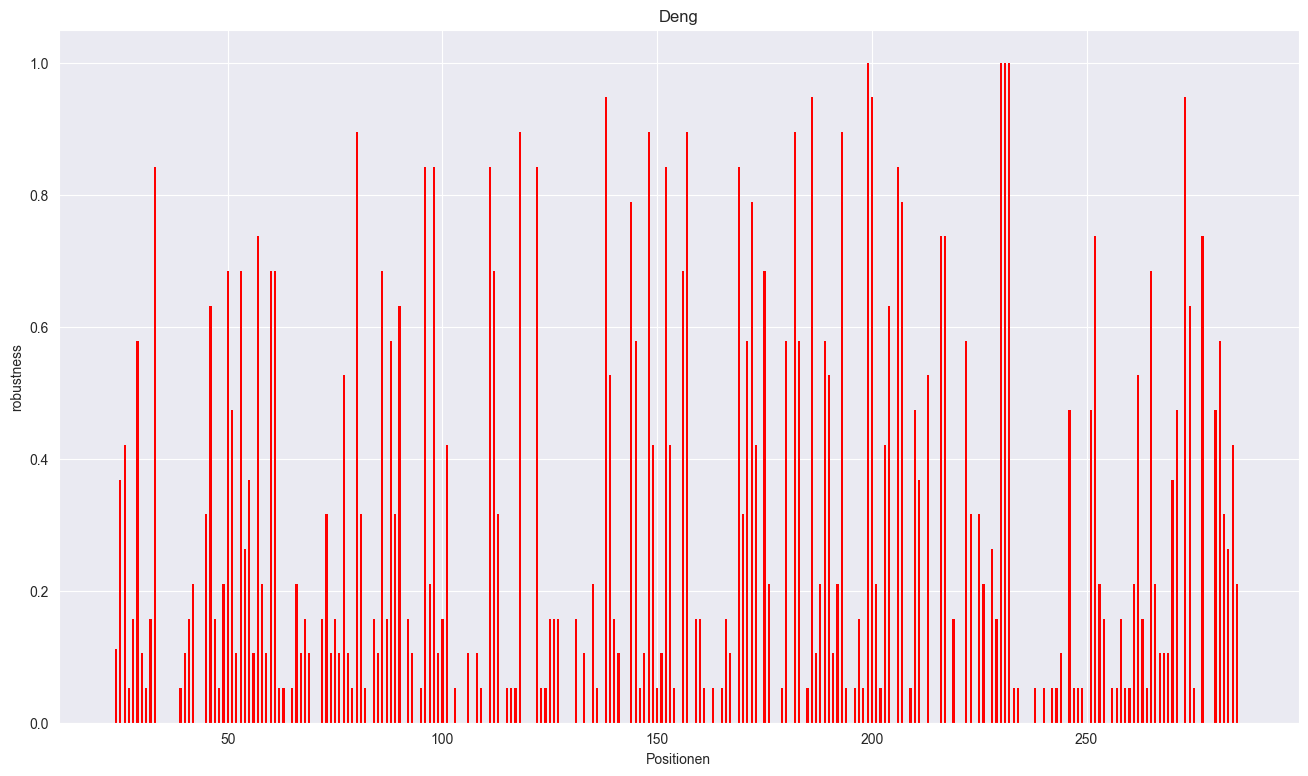

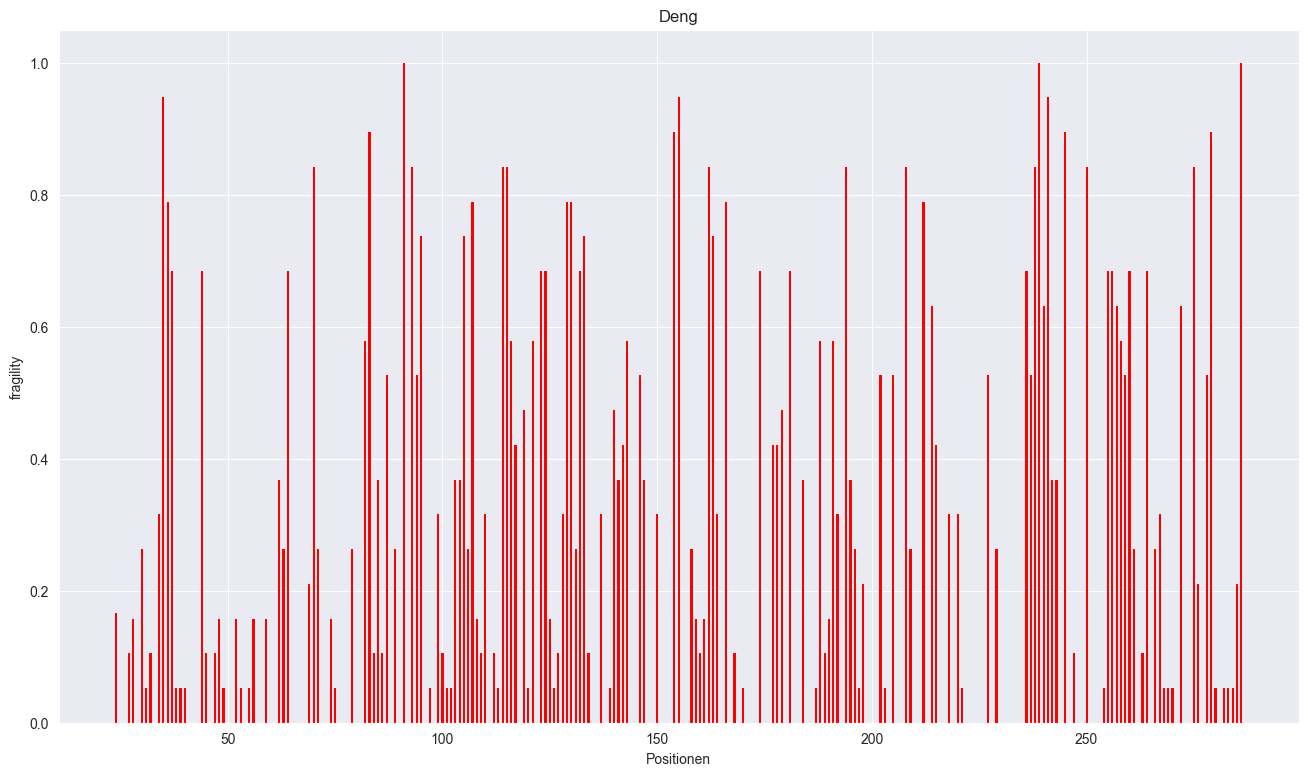

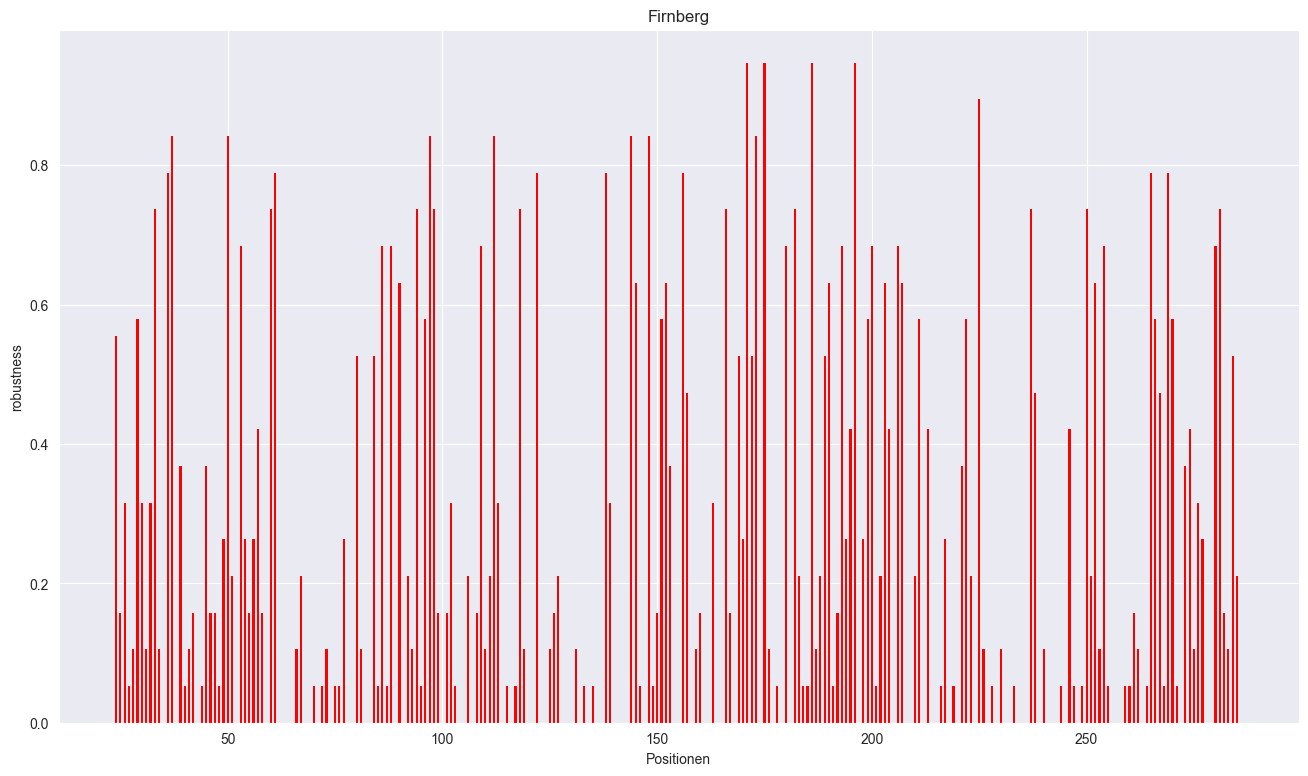

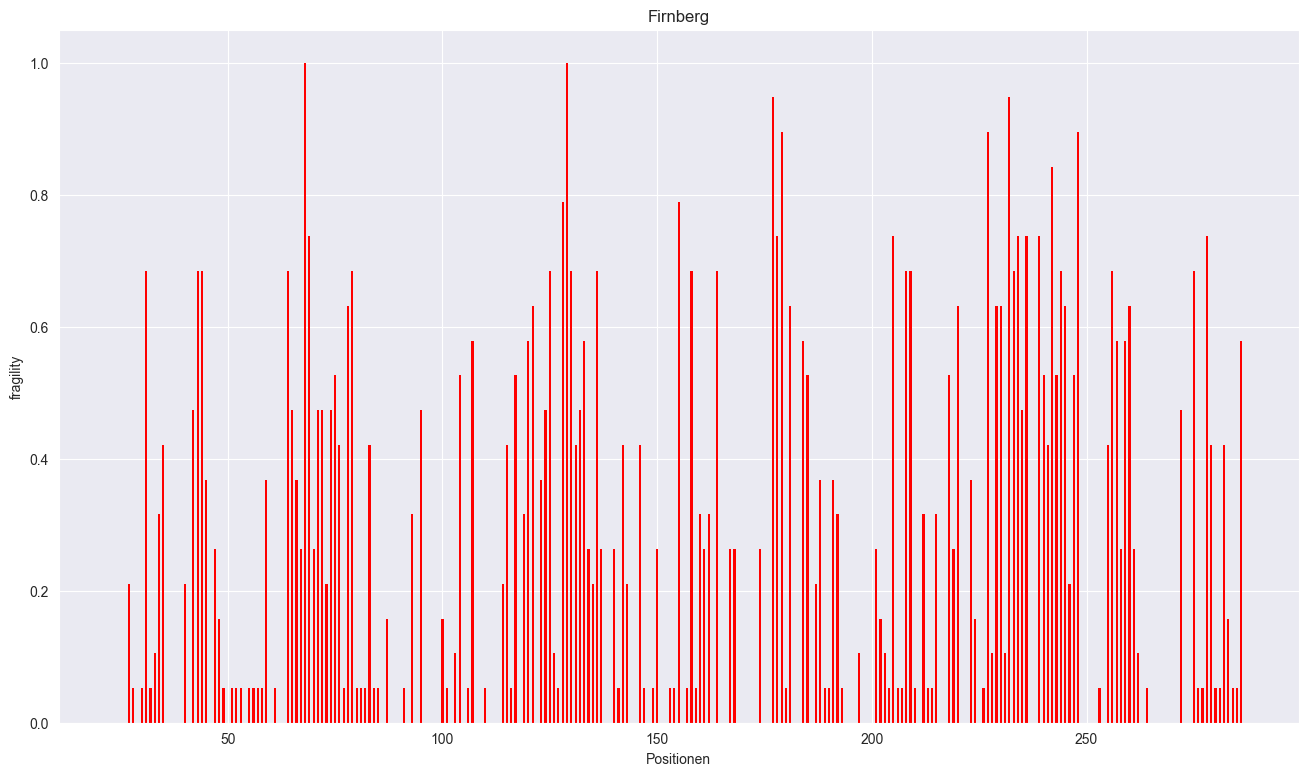

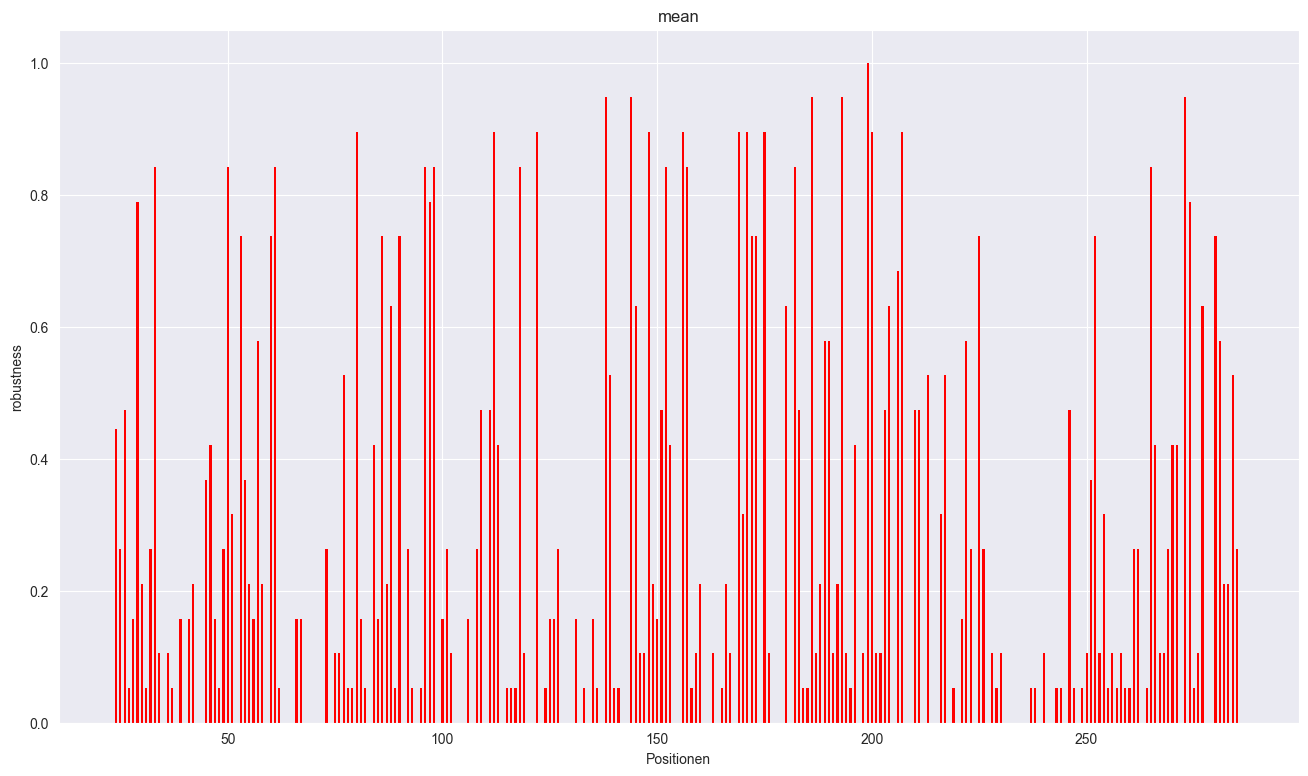

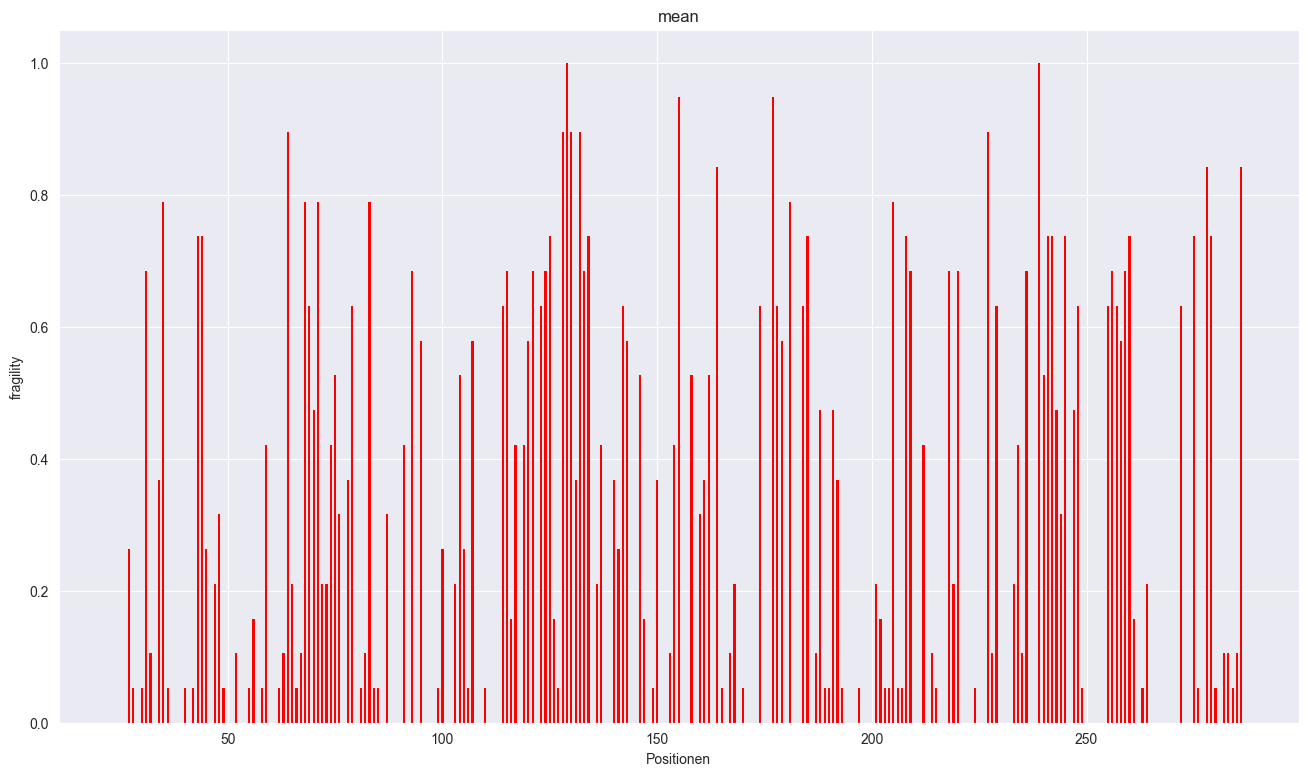

In [35]:
#plotten
for i in range (0, len(top_25_DSlist)):
    #tops
    ywerte = top_25_DSlist_poseff[i]
    xwerte = top_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("robustness")
    plt.title(top_25.columns[i])
    plt.show()

    #bottoms
    ywerte = bottom_25_DSlist_poseff[i]
    xwerte = bottom_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("fragility")
    plt.title(bottom_25.columns[i])
    plt.show()


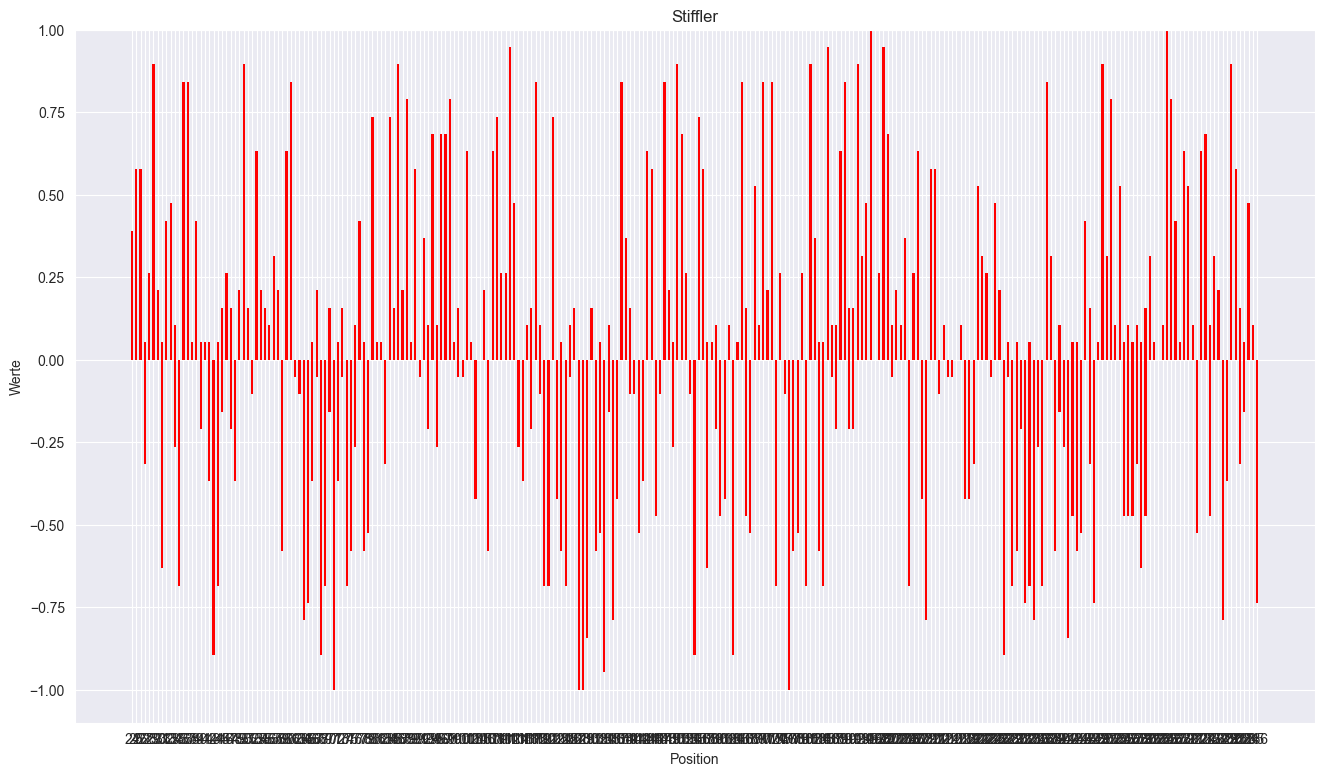

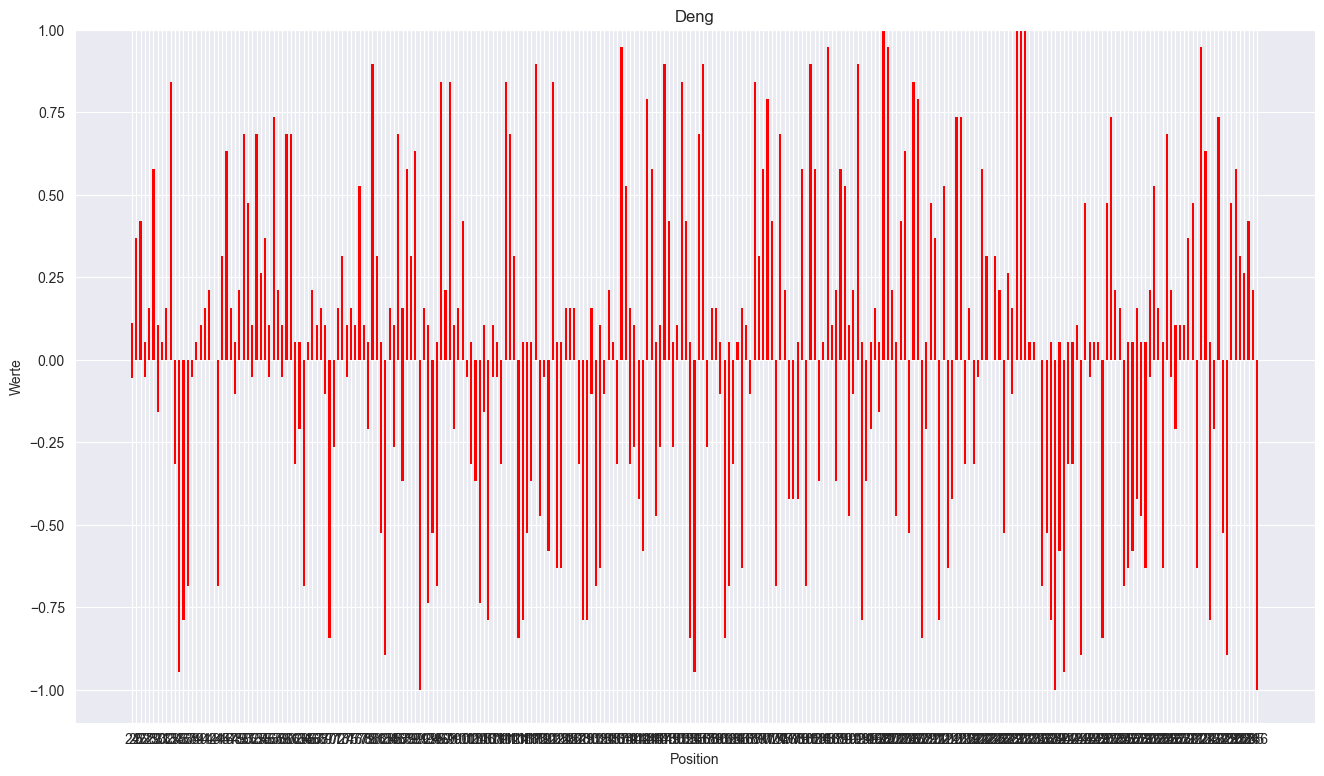

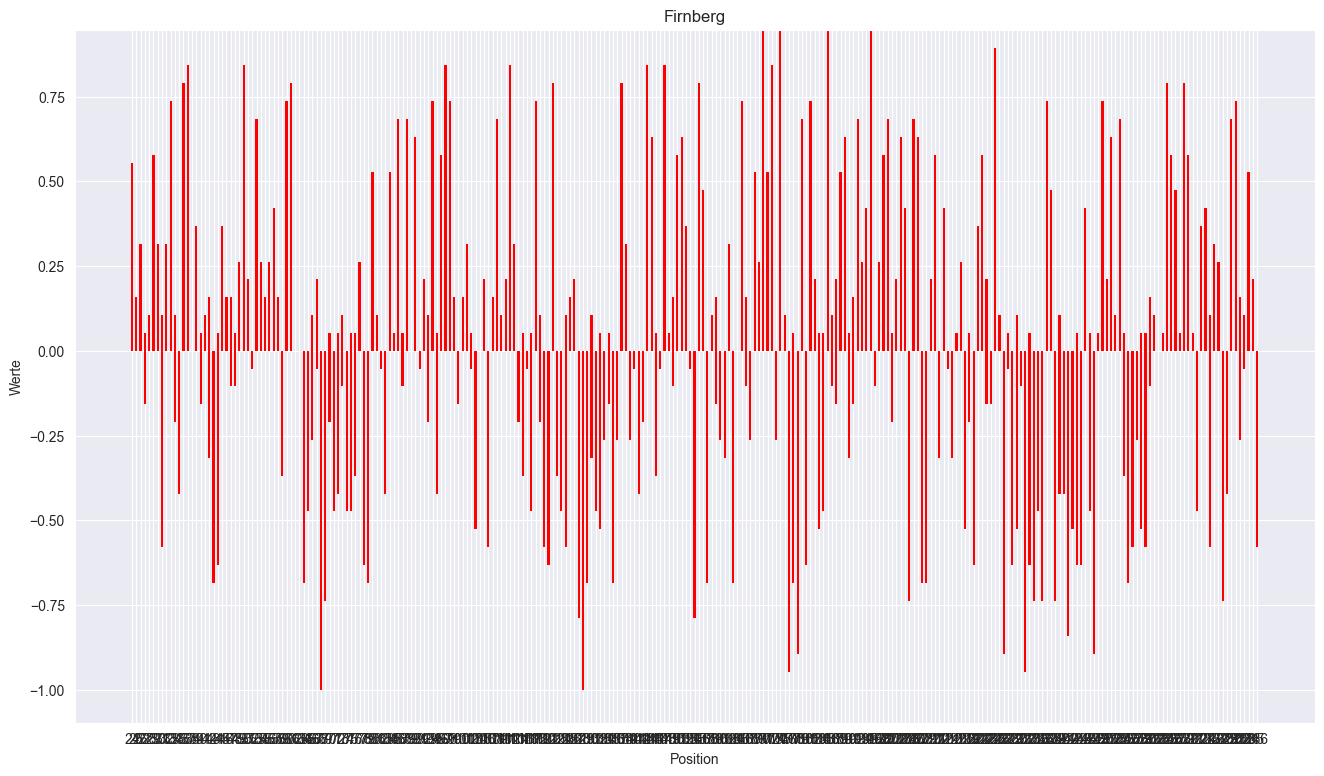

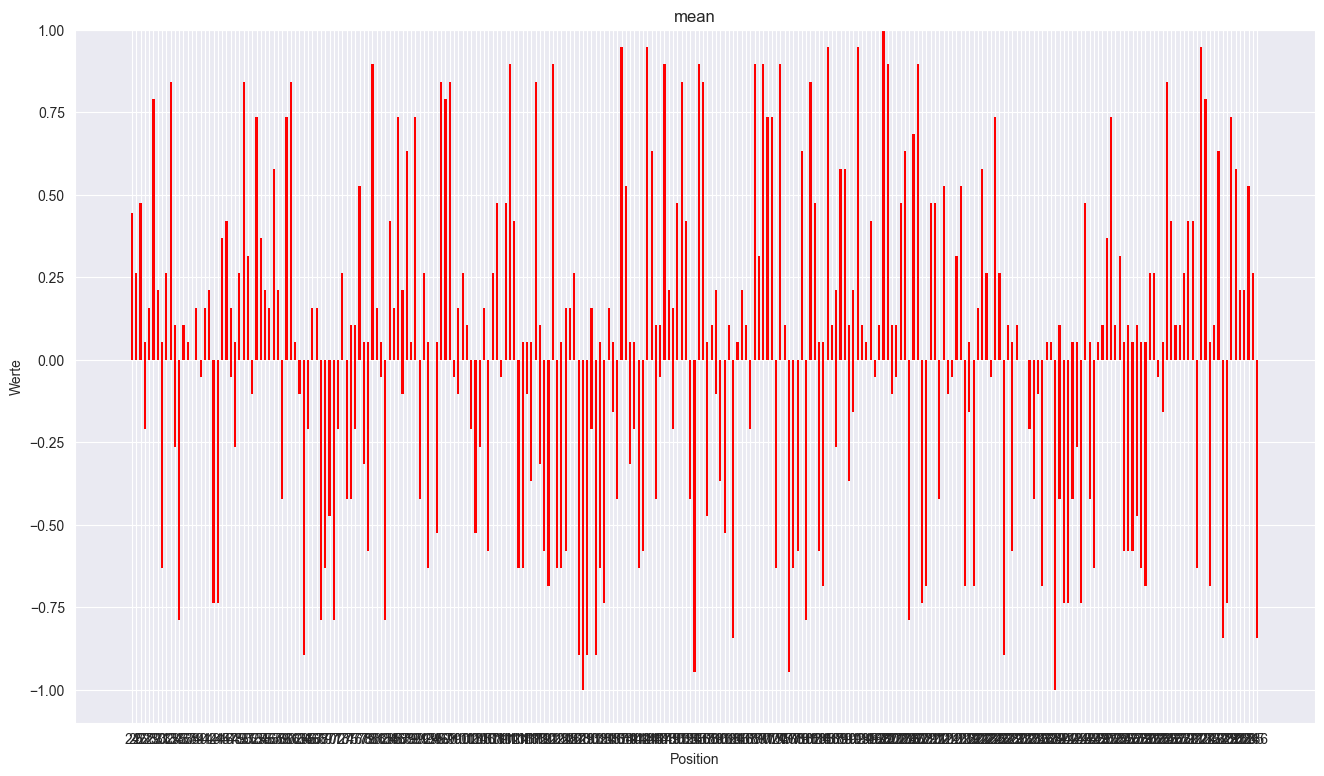

In [36]:
#andere plot Möglichkeit (Robustness (Top) nach oben, Fragility (Bottom) nach unten):

positions = top_25_DSlist_poseff[0].index

for i in range (0, len(top_25_DSlist)):
    top_values = top_25_DSlist_poseff[i]
    bottom_values = bottom_25_DSlist_poseff[i]*-1

# Breite der Balken

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_25.columns[i])

# Plot anzeigen
    plt.show()


aktuell: Position, für die alle Mutanten knapp über 75% Quantile liegen hätte 100% Robustness, genauso wie Position für die alle Mutanten über 95% Quantile liegen... da müsste noch differenziert werden.
Modell: Für jede Position Robustness/Fragility [%] für Quantile=75% bis 95% oder 99% berechnen->Kurve Fitten (x: Quantile, y: Fragility/Robustness [%] -> Area under Curve als F/R-score nehmen (evtl noch Bereiche für hohe Quantile größer Gewichten (also: y:F/R[%]*Q oder *Q^2 oder Q^3 etc. -> dann schauen welche Gewichtung die besten Ergebnisse gibt)

In [37]:
#F/R [%] für jede Position bei verschiedenen Quantilen berechnen
#tops:

top_Fit=mergedc_z_mv.copy()
top_Fit_DSlist=[]
for col in top_Fit.columns[:4]:
    new_DS = top_Fit[[col, 'Position']]
    top_Fit_DSlist.append(new_DS)



top_Fit_Qlist=[]
top_used_quantiles=[]
for i in range(0, len(top_Fit_DSlist)):
    top_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        top_Fit_Qlist[i].insert(j, top_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+50)/100 #iterate over Quantiles 75% - 99%
        t=top_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        top_Fit_Qlist[i][j].iloc[:,0]=(top_Fit_Qlist[i][j].iloc[:,0] >= t)
        if i == len(top_Fit_DSlist)-1:
            top_used_quantiles.append(q) #keep used quantiles for later weighting of quantile values

#calculate top % for each position for different quantile-threshholds for each dataset

top_Fit_Qlist_poseff=[]
for i in range (0, len(top_Fit_DSlist)):
    top_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=top_Fit_Qlist[i][j].iloc[:,0].groupby(top_Fit_Qlist[i][j].iloc[:,1])
        top_Fit_Qlist_poseff[i].insert(j, x.mean())

top_Fit_Qlist_poseff

#bottoms:
bottom_Fit=mergedc_z_mv.copy()
bottom_Fit_DSlist=[]
for col in bottom_Fit.columns[:4]:
    new_DS = bottom_Fit[[col, 'Position']]
    bottom_Fit_DSlist.append(new_DS)



bottom_Fit_Qlist=[]
bottom_used_quantiles=[]
for i in range(0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        bottom_Fit_Qlist[i].insert(j, bottom_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+1)/100 #iterate over Quantiles 1% - 25%
        t=bottom_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        bottom_Fit_Qlist[i][j].iloc[:,0]=(bottom_Fit_Qlist[i][j].iloc[:,0] <= t)
        if i == len(bottom_Fit_DSlist)-1:
            bottom_used_quantiles.append(q)

#calculate bottom % for each position for different quantile-threshholds for each dataset

bottom_Fit_Qlist_poseff=[]
for i in range (0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=bottom_Fit_Qlist[i][j].iloc[:,0].groupby(bottom_Fit_Qlist[i][j].iloc[:,1])
        bottom_Fit_Qlist_poseff[i].insert(j, x.mean())


In [38]:
#extract F/R % for each position at different quantiles for each dataset to plot curve and calculate area under curve as R/F-score of position:

#tops:
top_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(top_Fit_DSlist)): #iterate over datasets
    m=i*2
    for k in range(0,len(top_Fit_Qlist_poseff[0][0])): #iterate over positions
        top_pos_eff_quantiles=[]
        for j in range(0,50): #iterate over quantiles
            top_pos_eff_quantiles.append(top_Fit_Qlist_poseff[i][j].iloc[k])
        top_pos_eff_quantiles_df.iloc[k,m]=top_pos_eff_quantiles
top_pos_eff_quantiles_df = top_pos_eff_quantiles_df.drop(top_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


#bottoms:

bottom_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(bottom_Fit_DSlist)): #iterate over datasets
   m=i*2
   for k in range(0,len(bottom_Fit_Qlist_poseff[0][0])): #iterate over positions
     bottom_pos_eff_quantiles=[]
     for j in range(0,50): #iterate over quantiles
        bottom_pos_eff_quantiles.append(bottom_Fit_Qlist_poseff[i][j].iloc[k])
     bottom_pos_eff_quantiles_df.iloc[k,m]=bottom_pos_eff_quantiles
bottom_pos_eff_quantiles_df = bottom_pos_eff_quantiles_df.drop(bottom_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


In [39]:
#the pos_eff_quantiles_dfs contains for each Dataset and each position the F/R %s for Quantiles 75% - 99%
#now we want to fit curves to each position in each dataset
from scipy.integrate import trapz

top_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df.index.name = 'Position'

bottom_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df.index.name = 'Position'


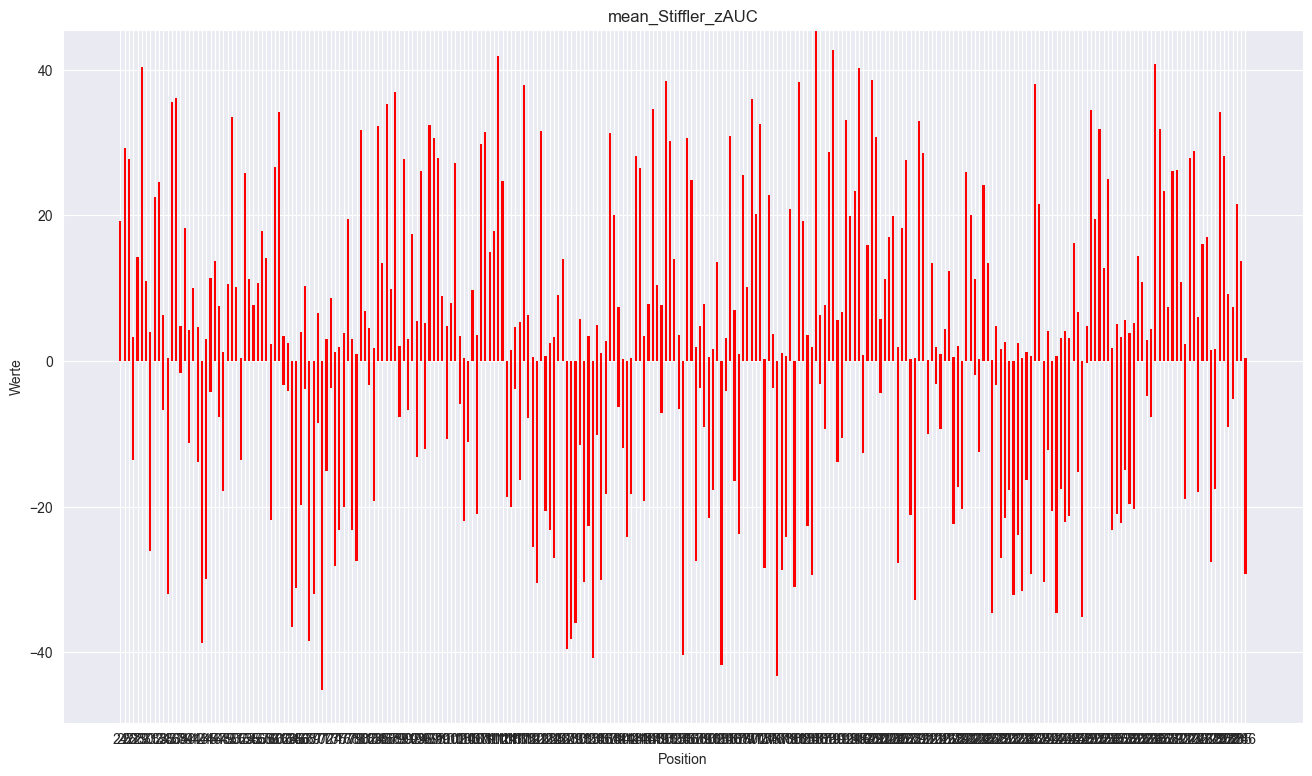

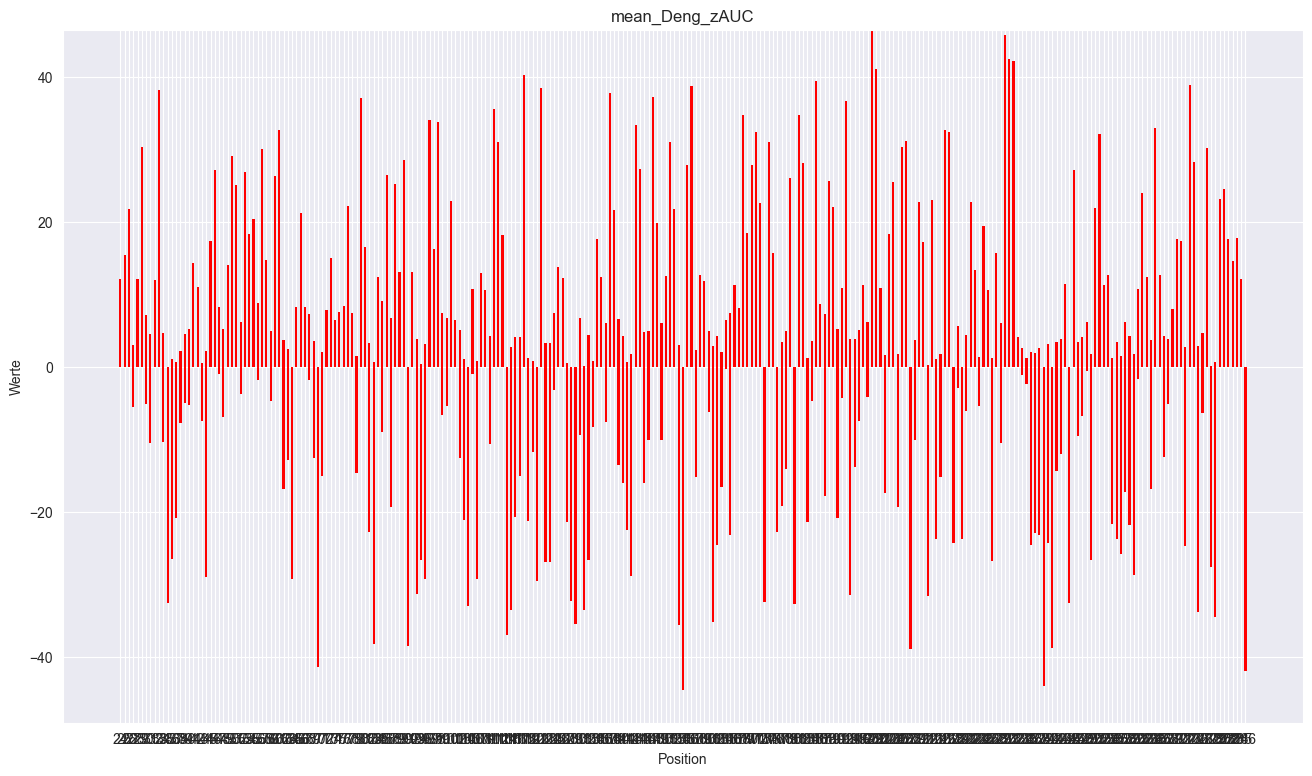

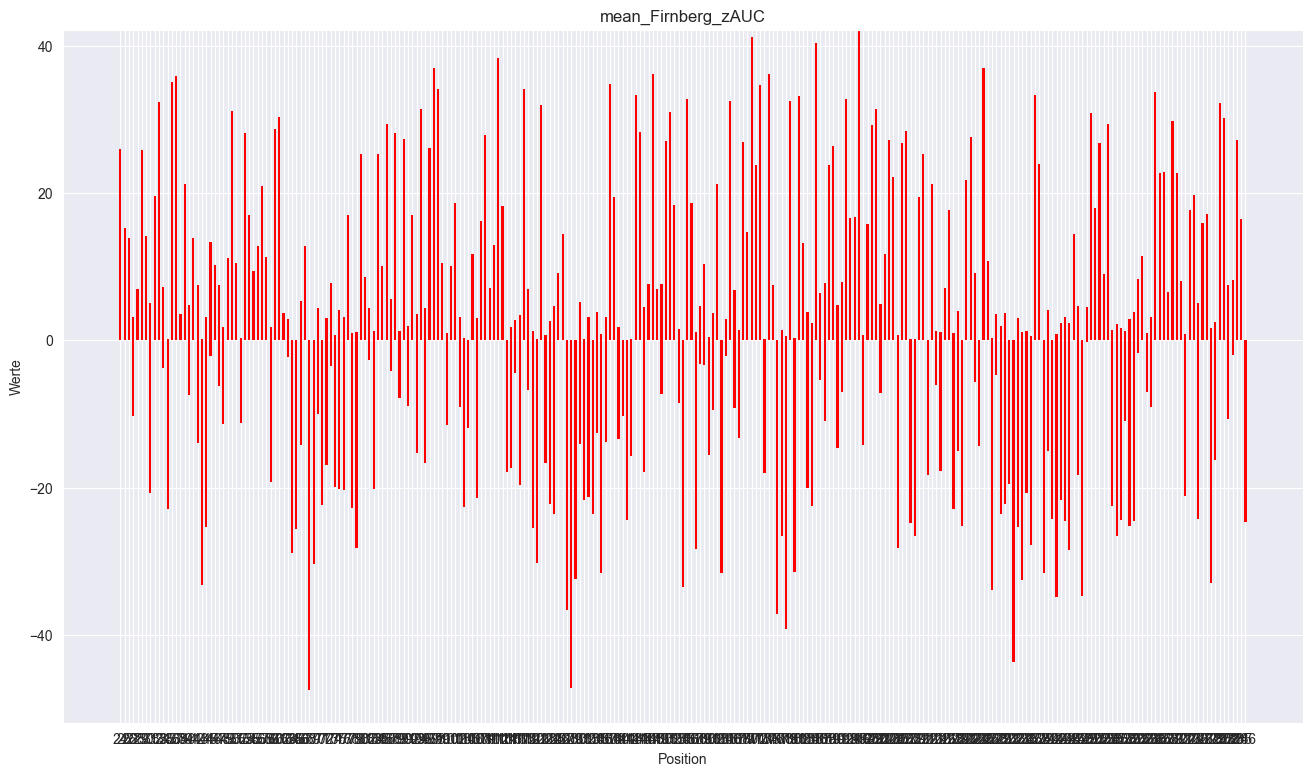

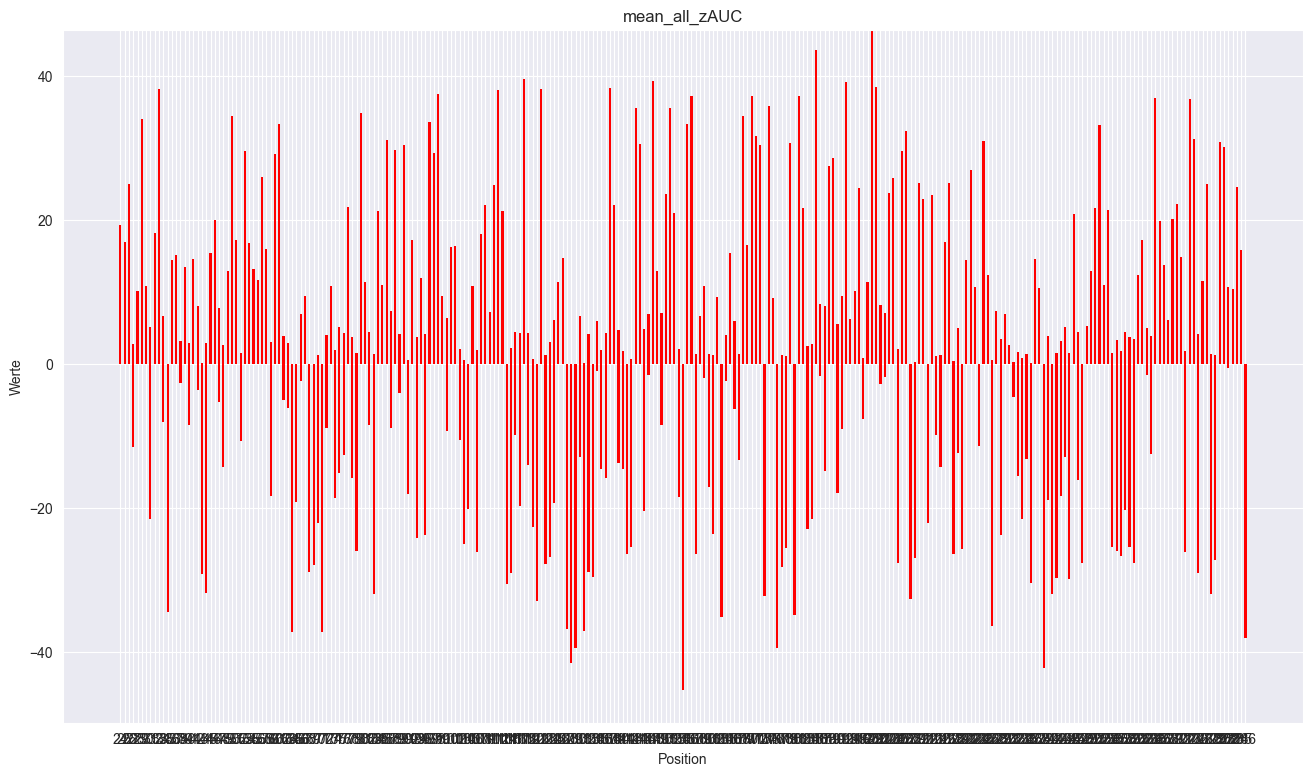

In [40]:
#plotten

positions = top_auc_df.index

for i in range (0, len(top_auc_df.columns)):
    top_values = top_auc_df.iloc[:,i]
    bottom_values = bottom_auc_df.iloc[:,i]*-1

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df.columns[i])

# Plot anzeigen
    plt.show()

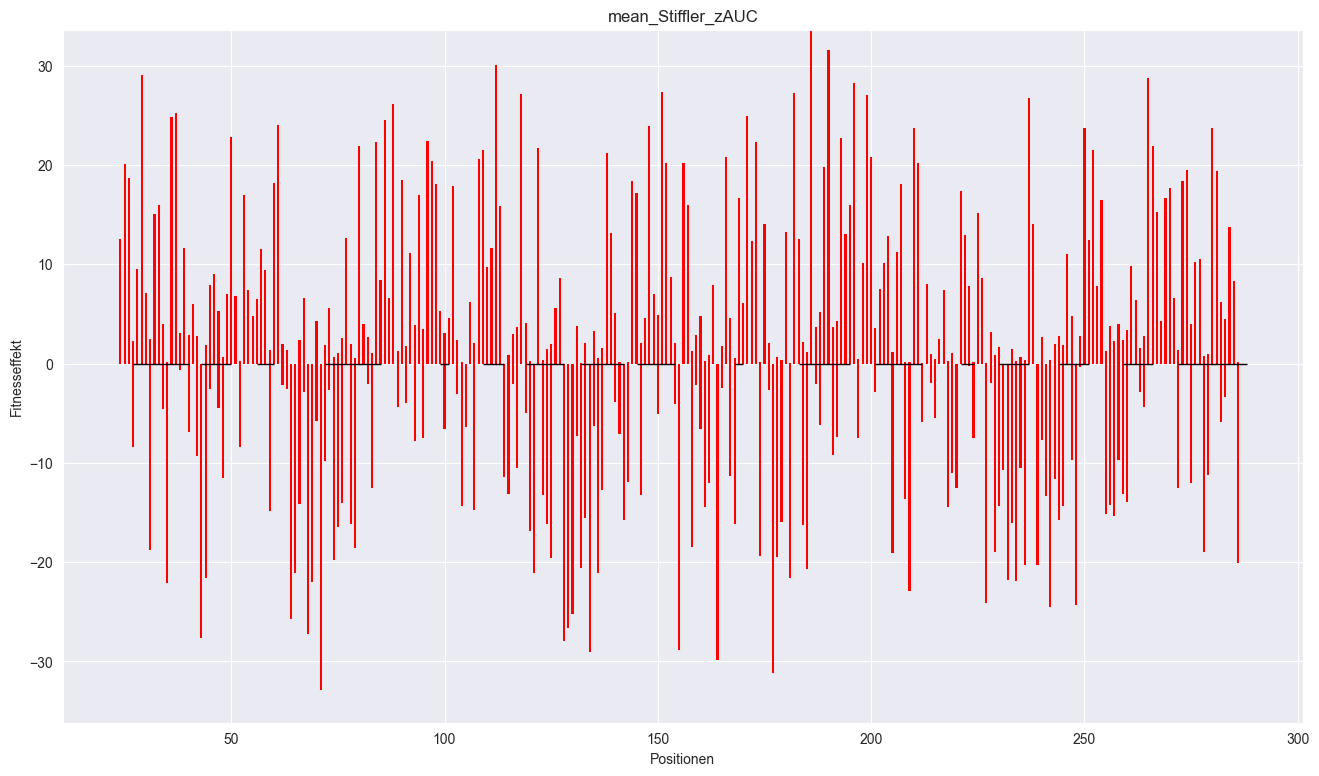

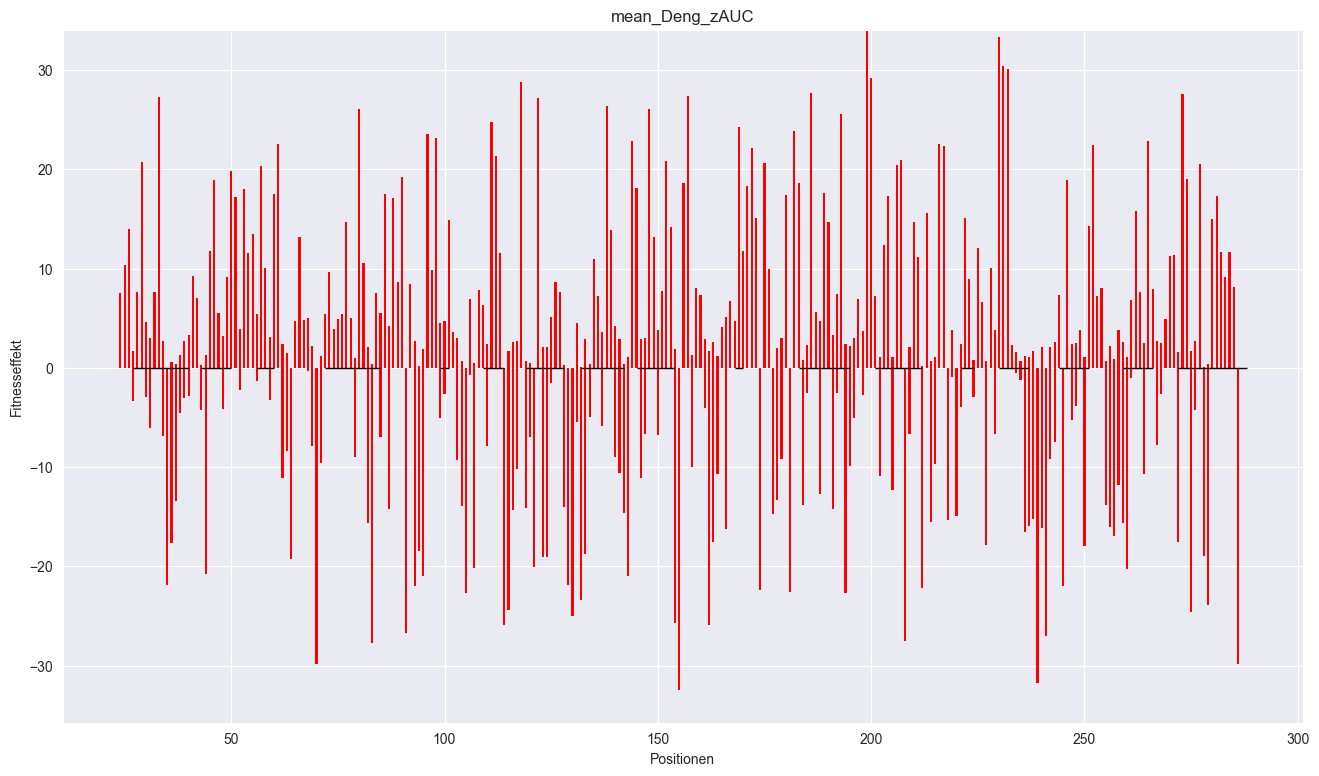

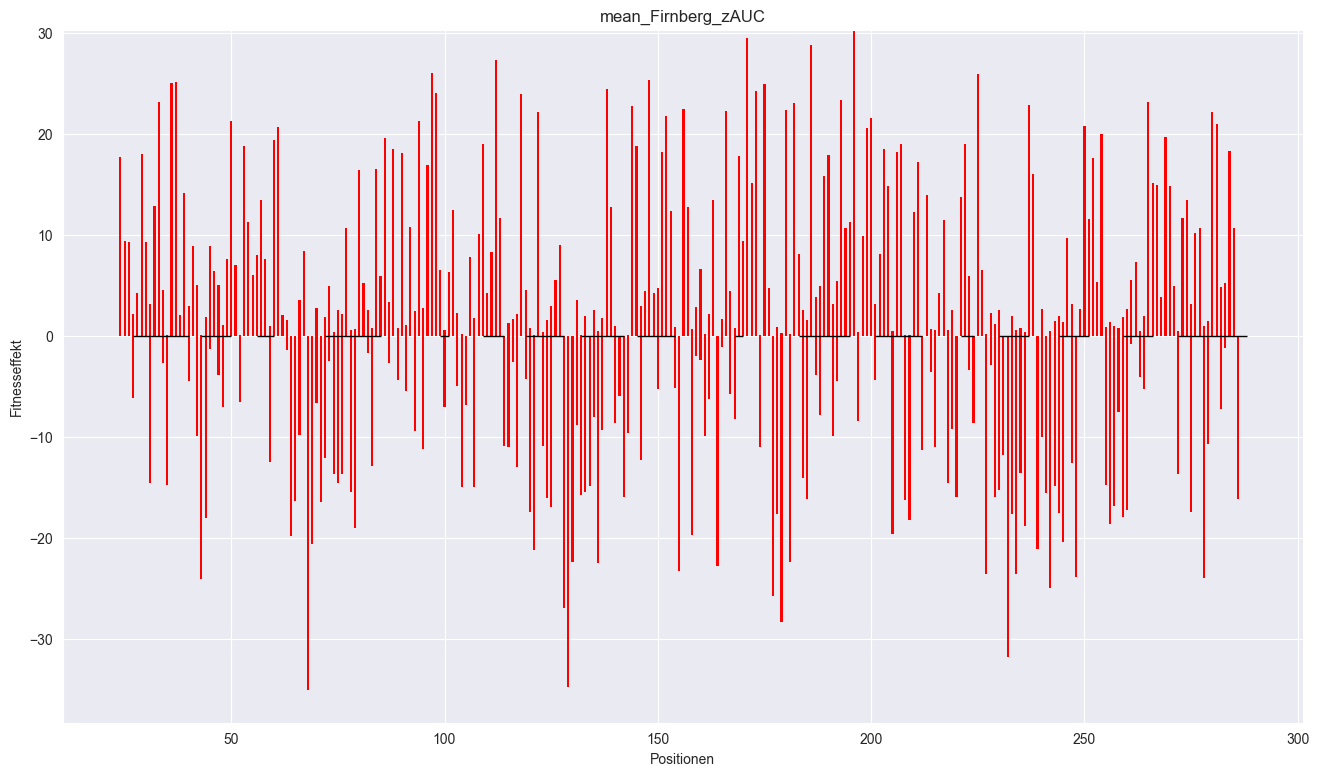

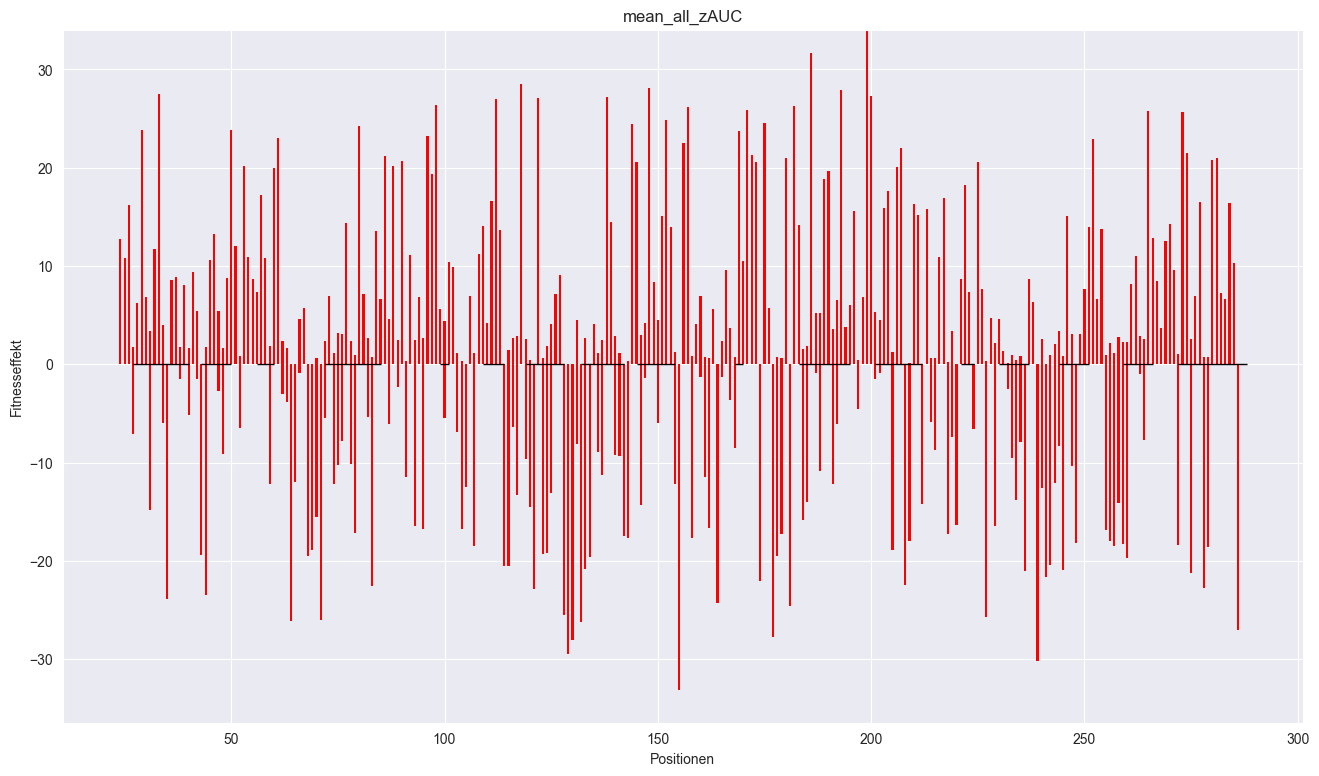

In [72]:
#extremere Werte stärer Gewichten (k=0 für ungewichtet; ansosnten je höher k, desto höher gewichtet sind extremere Bereiche)
k=1 #<----------------------!!!!!!!!!! STellschraube :P

top_used_quantiles=np.array(top_used_quantiles)
bottom_used_quantiles=np.flip(top_used_quantiles)

top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
for i in range(0, len(top_pos_eff_quantiles_df.columns)):
    for j in range(0, len(top_pos_eff_quantiles_df)):
        top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
    for j in range(0, len(bottom_pos_eff_quantiles_df)):
        bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

from scipy.integrate import trapz

top_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df_weighted.index.name = 'Position'

bottom_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df_weighted.index.name = 'Position'

#plotten

width = []
left = []

for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start)

for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    xwerte = top_auc_df_weighted.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, top_values, label='Top', color='red', width=0.5, linewidth=0)
    plt.bar(xwerte, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(top_auc_df_weighted.columns[i])
    plt.barh(0 , width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    plt.show()


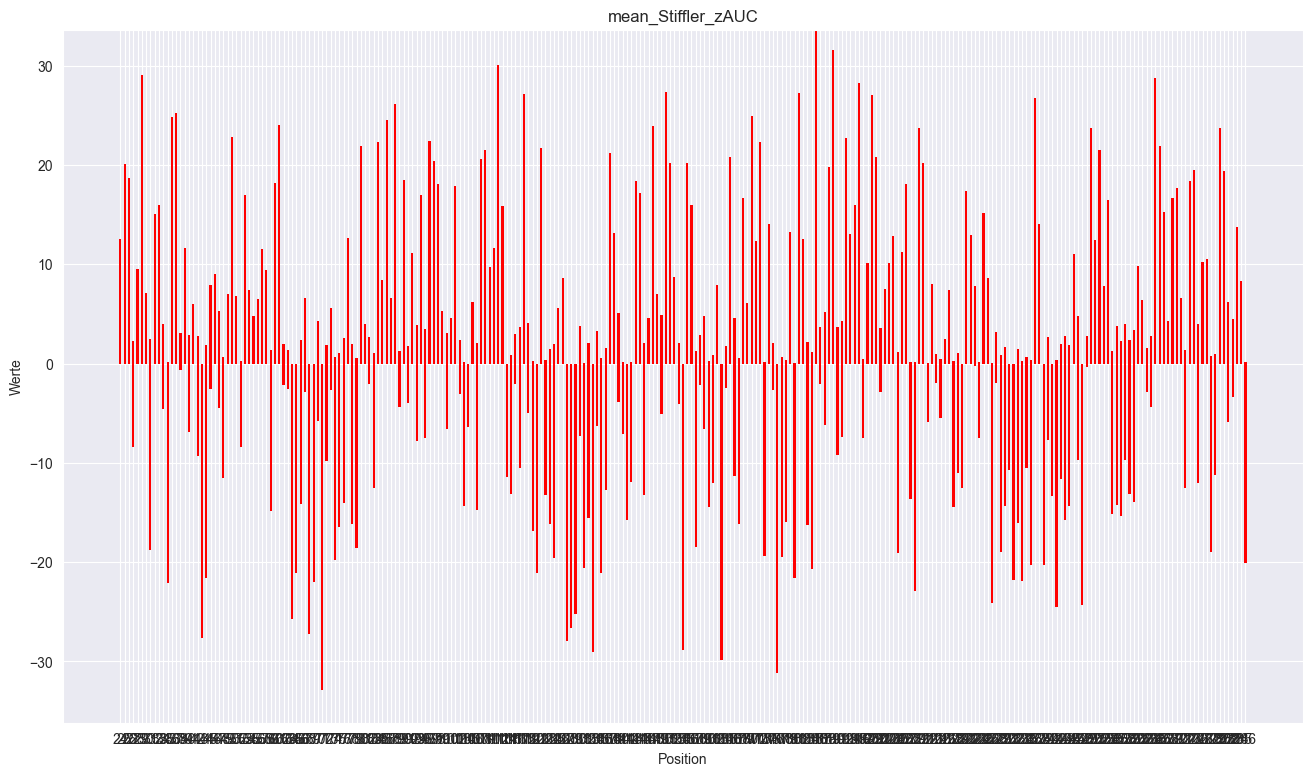

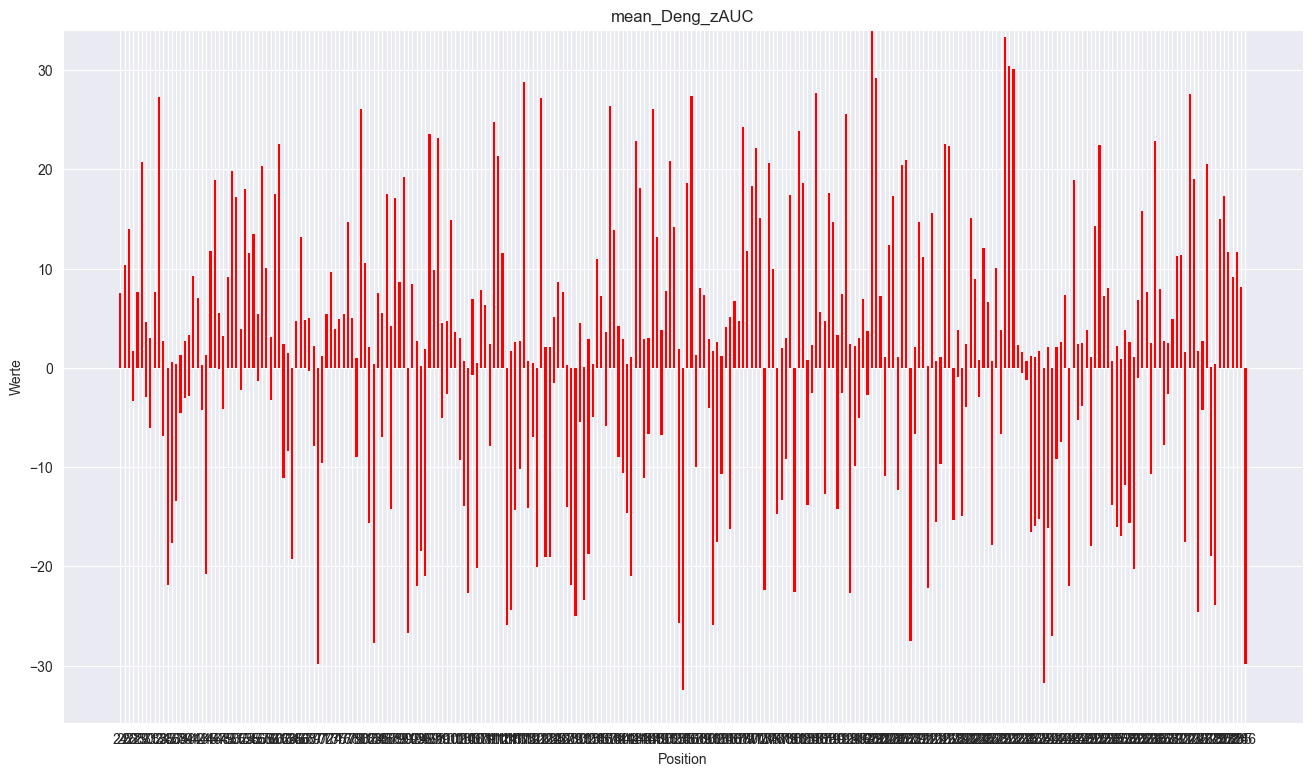

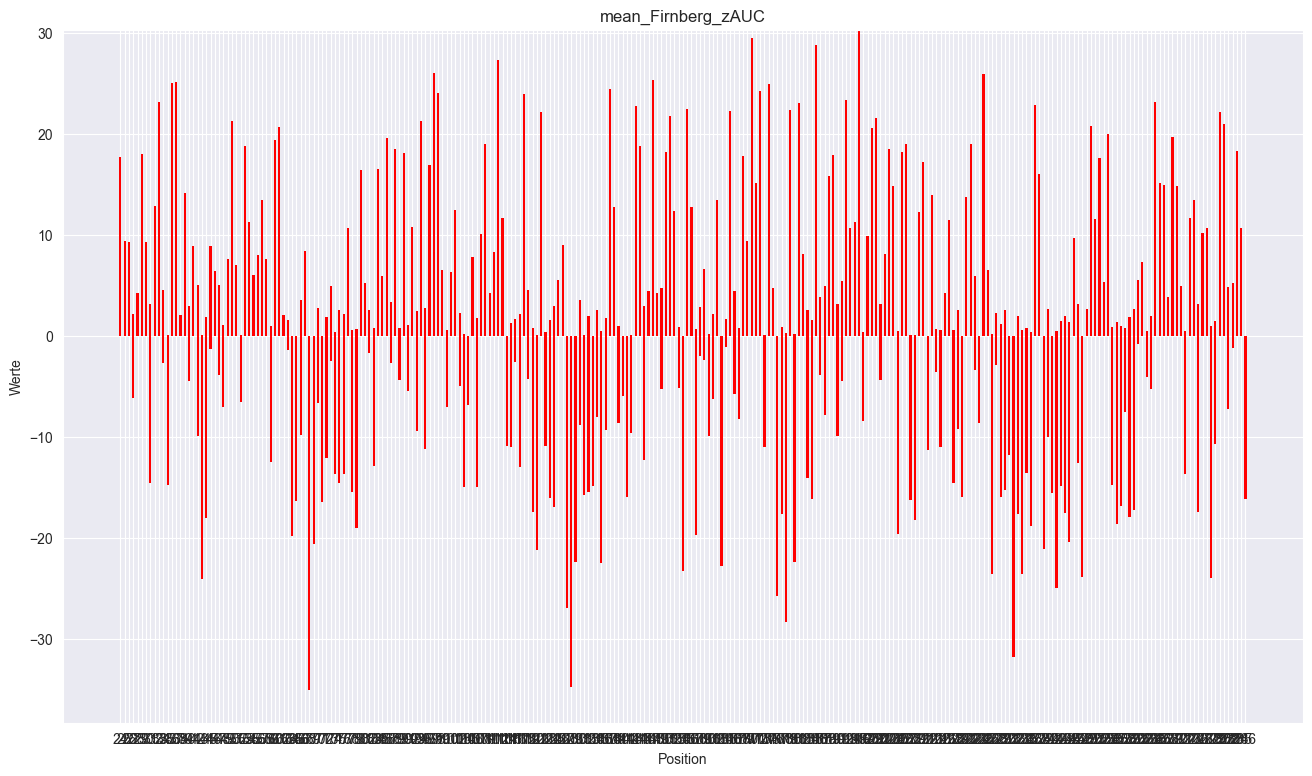

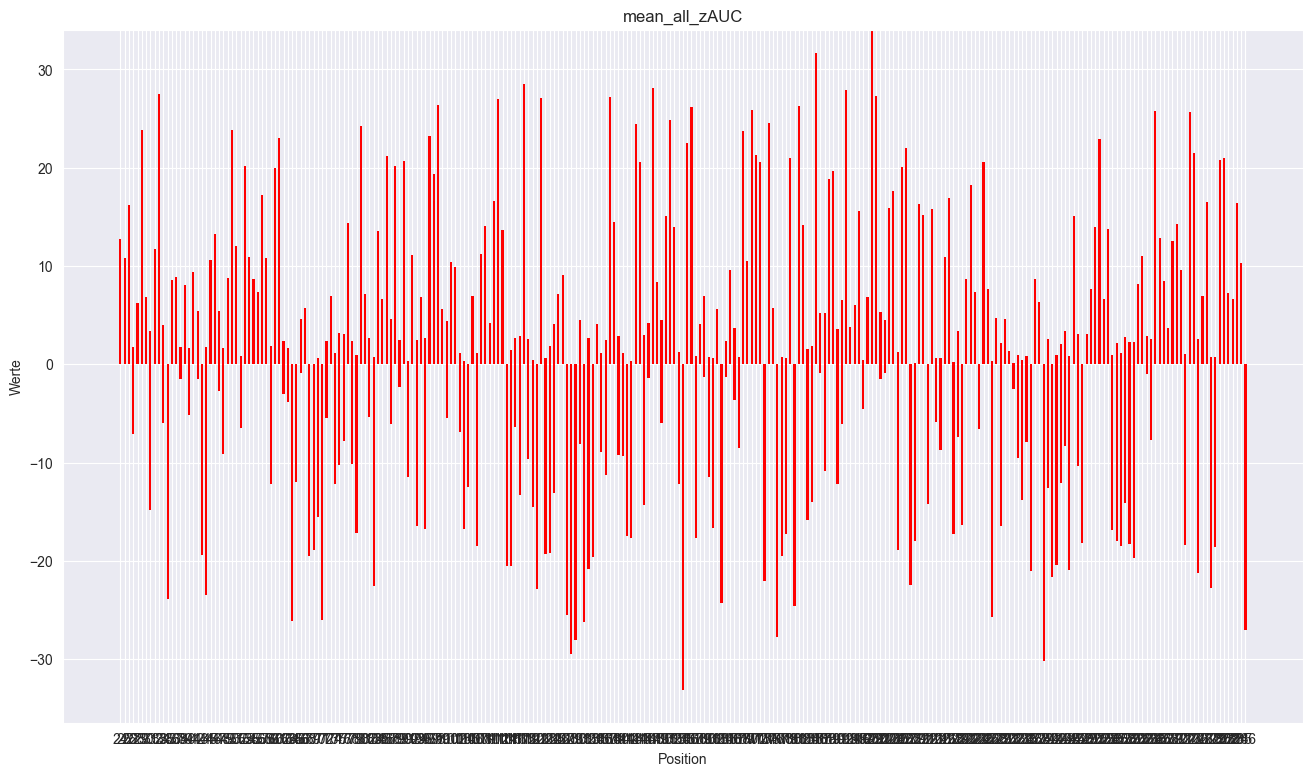

In [73]:
#egal:

positions = top_auc_df_weighted.index

for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    # X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

    # Barplot erstellen
    plt.figure(figsize=(16, 9))
    plt.bar(x, top_values, label='Top', color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

    # Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df_weighted.columns[i])

    # Plot anzeigen
    plt.show()


mean_Stiffler_zAUC  mean_Deng_zAUC  mean_Firnberg_zAUC  \
Position                                                           
24                  0.780080        0.269285            1.699645   
25                  2.241366        0.764455            0.212490   
26                  1.706161        0.634565            0.604940   
27                  0.253791        0.017212            0.196734   
28                  0.943954        0.262621            0.076225   
...                      ...             ...                 ...   
282                 0.614297        0.880634            0.189056   
283                 0.083709        0.318201            0.328466   
284                 0.419774        0.680817            1.346884   
285                 0.276045        0.677393            0.808204   
286                 0.000277        0.000000            0.000000   

          mean_all_zAUC  
Position                 
24             0.841726  
25             0.565348  
26             0.764530  
27             0.089293  
28             0.146821  
...                 ...  
282            0.580570  
283            0.269176  
284            1.082202  
285            0.663556  
286            0.000000  

[263 rows x 4 columns]

In [74]:
#verschiedene Ranglisten mit Wilcoxon Rank Sum Test untersuchen
#->signifikante Unterschiede in DS und Methoden?
samples = top_auc_df_weighted.columns[[0,1,2]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)):
            sample1 = top_auc_df_weighted[samples[i]]
            sample2 = top_auc_df_weighted[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



Wilcoxon-Signed-Rank-Test: mean_Stiffler_zAUC vs mean_Deng_zAUC
Statistik: 14500.0, p-Wert: 0.14871901296471685
Wilcoxon-Signed-Rank-Test: mean_Stiffler_zAUC vs mean_Firnberg_zAUC
Statistik: 13138.0, p-Wert: 0.15150379829195737
Wilcoxon-Signed-Rank-Test: mean_Deng_zAUC vs mean_Firnberg_zAUC
Statistik: 13121.0, p-Wert: 0.008776026548225157


In [43]:
#verschiedene Ranglisten mit Wilcoxon Rank Sum Test untersuchen
#->signifikante Unterschiede in DS und Methoden?
samples = bottom_auc_df_weighted.columns[[0,1,2]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)): #-1 damit nicht mean_all auch getestet wird
            sample1 = bottom_auc_df_weighted[samples[i]]
            sample2 = bottom_auc_df_weighted[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



Wilcoxon-Signed-Rank-Test: mean_Stiffler_zAUC vs mean_Deng_zAUC
Statistik: 16320.0, p-Wert: 1.0
Wilcoxon-Signed-Rank-Test: mean_Stiffler_zAUC vs mean_Firnberg_zAUC
Statistik: 14311.0, p-Wert: 0.8035490193853754
Wilcoxon-Signed-Rank-Test: mean_Deng_zAUC vs mean_Firnberg_zAUC
Statistik: 16366.0, p-Wert: 0.9448724929592376


In [44]:
bottom_auc_df_weighted

mean_Stiffler_zAUC  mean_Deng_zAUC  mean_Firnberg_zAUC  \
Position                                                           
24                  0.000089        0.185990            0.000629   
25                  0.000596        0.101610            0.000755   
26                  0.000000        0.000862            0.000013   
27                  0.338771        0.072008            0.163887   
28                  0.070169        0.104666            0.017469   
...                      ...             ...                 ...   
282                 0.685242        0.028208            0.683193   
283                 0.214000        0.122350            0.186927   
284                 0.032345        0.030184            0.023887   
285                 0.116207        0.149127            0.050002   
286                 1.664873        3.469104            0.700765   

          mean_all_zAUC  
Position                 
24             0.000308  
25             0.000356  
26             0.000000  
27             0.225589  
28             0.040788  
...                 ...  
282            0.117472  
283            0.101986  
284            0.057970  
285            0.139237  
286            3.608750  

[263 rows x 4 columns]

HISTOGRAMS

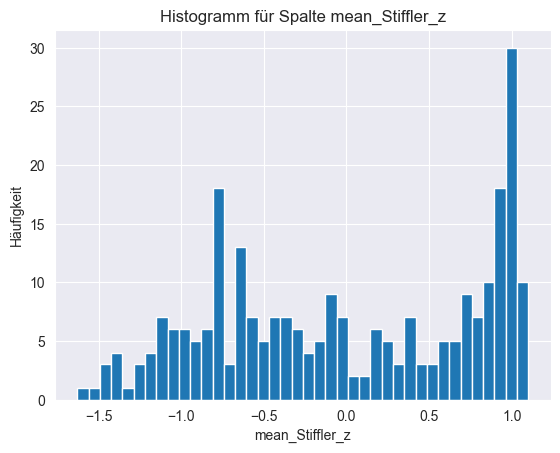

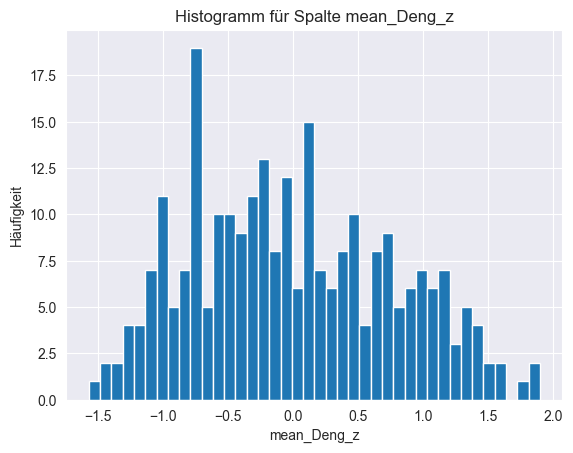

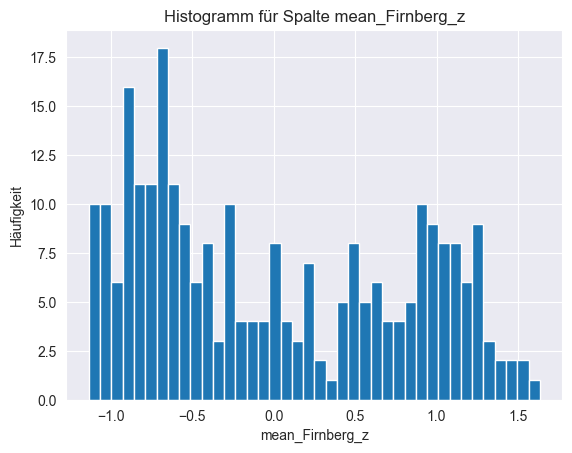

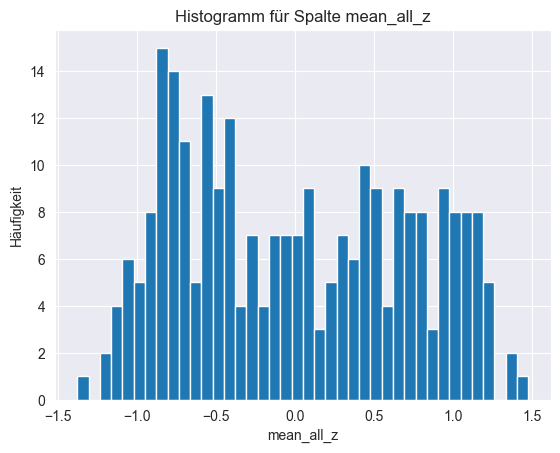

In [75]:
selected_columns = position_means_Z.iloc[:, [0, 2, 4, 6]]
klassen = 40

for column in selected_columns:
    plt.hist(selected_columns[column], bins=klassen)
    plt.xlabel(column)
    plt.ylabel("Häufigkeit")
    plt.title(f"Histogramm für Spalte {column}")
    plt.show()

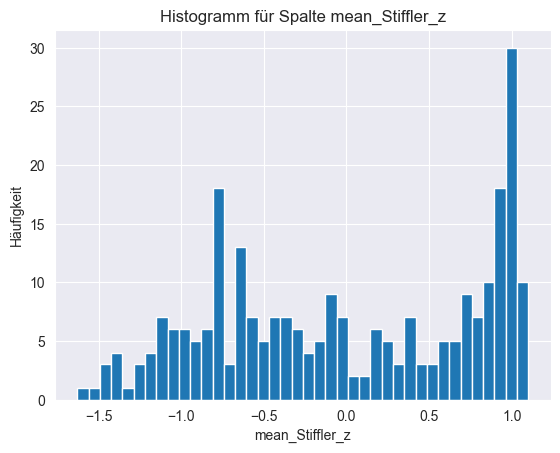

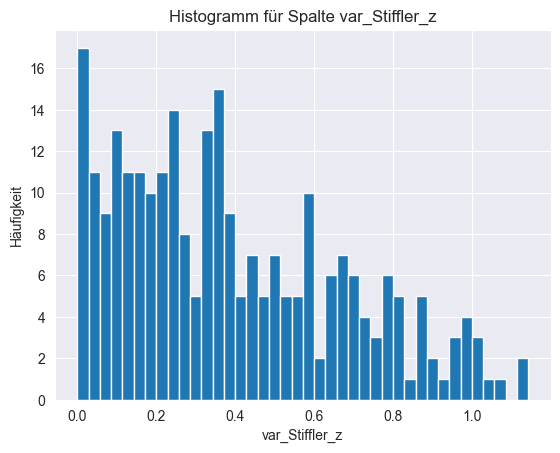

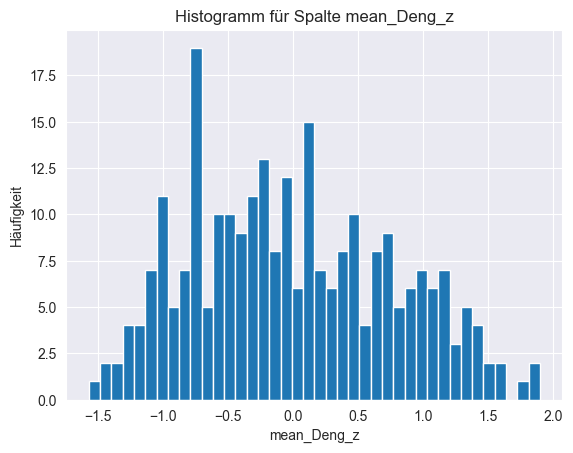

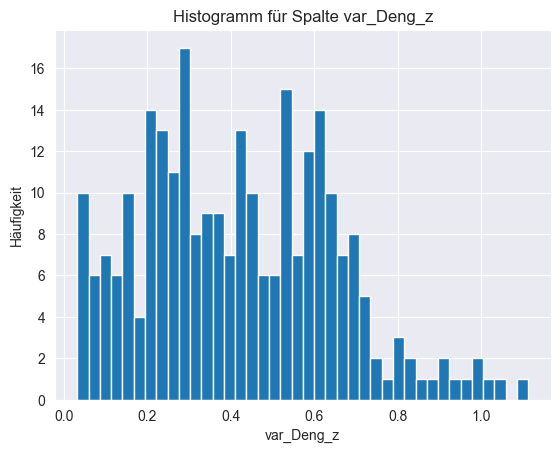

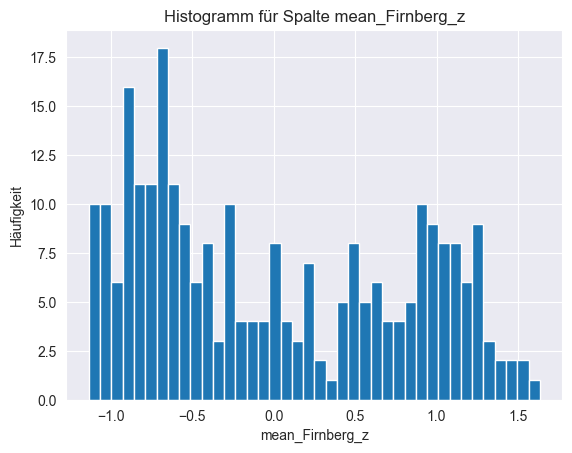

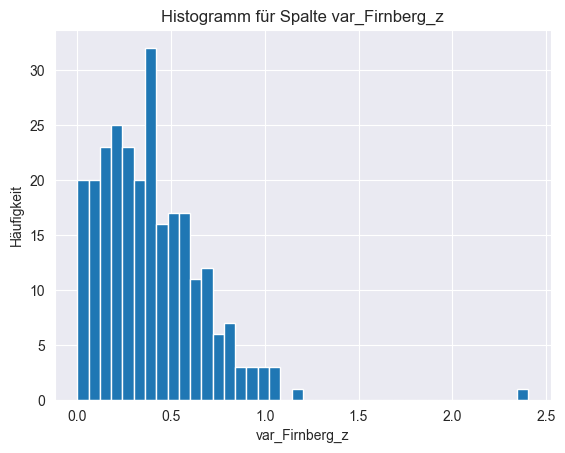

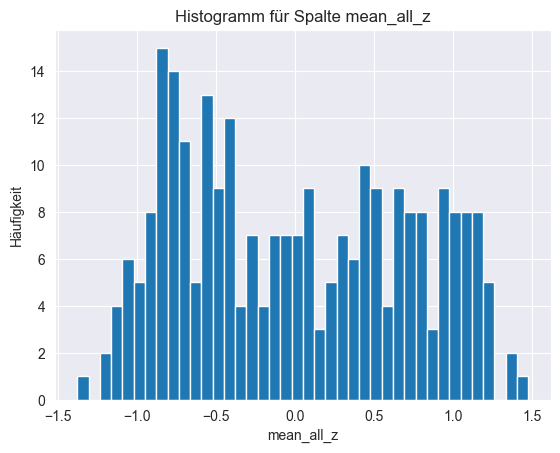

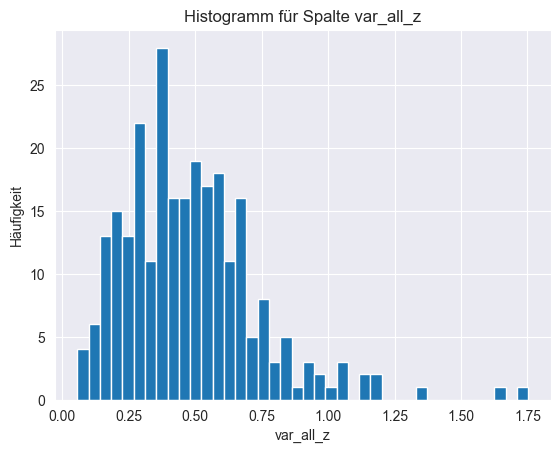

In [70]:

klassen = 40


for column in position_means_Z.columns:
    plt.hist(position_means_Z[column], bins=klassen)
    plt.xlabel(column)
    plt.ylabel("Häufigkeit")
    plt.title(f"Histogramm für Spalte {column}")
    plt.show()